## Análisis del laboratorio de masa

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import custom libraries
import warnings
import sys
import os

# Subir dos niveles desde notebooks/mod_tecnico/ hasta la raíz del repo
repo_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))  
sys.path.append(repo_path)

# Ahora intenta importar
from src.data_processing import ready_to_import

In [3]:
#Importar librerias para graficar
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots  import make_subplots

In [4]:
# Importamos lo necesario para trabajar con consultas SQL

from pandasql import sqldf

# Definir función de consulta
pysqldf = lambda q: sqldf(q, globals())

#### Se carga el dataset 

In [5]:
# Import data from Excel files
url = "https://raw.githubusercontent.com/MiguelOscar-Insco/data-INSCO-hub/main/data/raw/temperatura_25.xlsx"
temperatura = pd.read_excel(url)

In [6]:
# Resumen estadístico de la tabla
temperatura.describe()

,lab_received_date,scheduled_delivery_date,cleaning_date,calibration_date,delivery_date,delivery_time,assigned_time,substitution_reason,piece_count
count,603,563,0.0,603,603,603.000000,603.000000,0.0,603.0
mean,2025-01-21 03:37:18.805970176,2025-02-15 04:41:20.994671360,NaN,2025-02-03 22:07:45.671641856,2025-02-09 21:29:33.134328320,11.854063,15.751244,NaN,1.0
min,2024-09-09 00:00:00,2024-12-27 00:00:00,NaN,2024-12-09 00:00:00,2025-01-06 00:00:00,1.000000,0.000000,NaN,1.0
25%,2024-12-13 00:00:00,2025-01-24 00:00:00,NaN,2025-01-13 00:00:00,2025-01-17 00:00:00,4.000000,12.000000,NaN,1.0
50%,2025-01-22 00:00:00,2025-02-10 00:00:00,NaN,2025-01-30 00:00:00,2025-02-04 00:00:00,9.000000,14.000000,NaN,1.0
75%,2025-02-21 00:00:00,2025-03-10 12:00:00,NaN,2025-02-26 00:00:00,2025-03-05 00:00:00,18.000000,20.500000,NaN,1.0
max,2025-03-26 00:00:00,2025-04-10 00:00:00,NaN,2025-03-28 00:00:00,2025-03-31 00:00:00,36.000000,38.000000,NaN,1.0
std,NaN,NaN,NaN,NaN,NaN,9.661992,8.847047,NaN,0.0


In [7]:
temperatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            603 non-null    object        
 1   so                       603 non-null    object        
 2   assignee                 633 non-null    object        
 3   calibrator               603 non-null    object        
 4   supervisor               602 non-null    object        
 5   approver                 598 non-null    object        
 6   classification           603 non-null    object        
 7   lab_received_date        603 non-null    datetime64[ns]
 8   scheduled_delivery_date  563 non-null    datetime64[ns]
 9   cleaning_date            0 non-null      float64       
 10  calibration_date         603 non-null    datetime64[ns]
 11  delivery_date            603 non-null    datetime64[ns]
 12  delivery_time            603 non-nul

In [8]:
temperatura.isnull().sum()

report_number               30
so                          30
assignee                     0
calibrator                  30
supervisor                  31
approver                    35
classification              30
lab_received_date           30
scheduled_delivery_date     70
cleaning_date              633
calibration_date            30
delivery_date               30
delivery_time               30
process_status              30
assigned_time               30
service_location            30
substitution_reason        633
lab_observations           557
priority                    30
piece_count                 30
dtype: int64

In [9]:
temperatura.dtypes

report_number                      object
so                                 object
assignee                           object
calibrator                         object
supervisor                         object
approver                           object
classification                     object
lab_received_date          datetime64[ns]
scheduled_delivery_date    datetime64[ns]
cleaning_date                     float64
calibration_date           datetime64[ns]
delivery_date              datetime64[ns]
delivery_time                     float64
process_status                     object
assigned_time                     float64
service_location                   object
substitution_reason               float64
lab_observations                   object
priority                           object
piece_count                       float64
dtype: object

In [10]:
# Se hace una copia de la tabla para evitar problemas de referencia
temp = temperatura.copy()

In [11]:
temp = ready_to_import.to_prepare_db(temp)
# Verificamos nuevamente los tipos de datos de cada columna y la cantidad de datos nulos
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            603 non-null    object        
 1   so                       603 non-null    object        
 2   assignee                 603 non-null    object        
 3   calibrator               603 non-null    object        
 4   supervisor               602 non-null    object        
 5   approver                 598 non-null    object        
 6   classification           603 non-null    object        
 7   lab_received_date        603 non-null    datetime64[ns]
 8   scheduled_delivery_date  563 non-null    datetime64[ns]
 9   cleaning_date            0 non-null      float64       
 10  calibration_date         603 non-null    datetime64[ns]
 11  delivery_date            603 non-null    datetime64[ns]
 12  delivery_time            603 non-nul

In [12]:
pieces = pysqldf("""
                 SELECT piece_count, COUNT(piece_count) AS count
                 FROM temp
                 GROUP BY piece_count
                 """)
pieces

,piece_count,count
0,1.0,603


In [13]:
temp.loc[temp['lab_observations'].isnull() == False]
#temp.describe()

,report_number,so,assignee,calibrator,supervisor,approver,classification,lab_received_date,scheduled_delivery_date,cleaning_date,calibration_date,delivery_date,delivery_time,process_status,assigned_time,service_location,substitution_reason,lab_observations,priority,piece_count
44,CCM0045.T/2025,I0046,Tania Nieto Lima,Tania Nieto Lima,Ramiro Martínez Espinosa,Ramiro Martínez Espinosa,RTD,2025-01-15,2025-01-27,NaN,2025-01-15,2025-01-22,5.0,ENTREGADO,8.0,LAB,NaN,URGENTE,URGENTE,1.0
136,CCM0147.T/2025,I0161,Tania Nieto Lima,Tania Nieto Lima,Ramiro Martínez Espinosa,Ramiro Martínez Espinosa,TLD,2025-01-31,2025-02-10,NaN,2025-02-24,2025-02-25,16.0,ENTREGADO,5.0,SITIO,NaN,SITIO,ORDINARIO,1.0
139,CCM0150.T/2025,I0172,"David Bautista Hernández, Laura Ivonne Pérez G...",David Bautista Hernández,Ramiro Martínez Espinosa,Ramiro Martínez Espinosa,TLD,2025-02-04,NaT,NaN,2025-02-05,2025-02-06,1.0,ENTREGADO,0.0,SITIO,NaN,El cliente solicita el cambio en la descripció...,ORDINARIO,1.0
151,CCM0162.T/2025,I0187,David Bautista Hernández,David Bautista Hernández,Dulce María Ramírez Contla,Dulce María Ramírez Contla,TLD,2025-02-07,2025-02-28,NaN,2025-02-11,2025-02-13,4.0,ENTREGADO,15.0,LAB,NaN,en el punto de 0°C No cumple la especificación...,ORDINARIO,1.0
152,CCM0163.T/2025,I0187,David Bautista Hernández,David Bautista Hernández,Dulce María Ramírez Contla,Dulce María Ramírez Contla,TLD,2025-02-07,2025-02-28,NaN,2025-02-11,2025-02-13,4.0,ENTREGADO,15.0,LAB,NaN,DISPLAY ESTRELLADO Y NO INDICA LA TEMPERATURA ...,ORDINARIO,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,CCM2989.T/2024,H2432,Mariela Sánchez Velázquez,Mariela Sánchez Velázquez,Dulce María Ramírez Contla,Dulce María Ramírez Contla,TLD,2024-12-11,2025-01-15,NaN,2025-01-09,2025-01-16,24.0,ENTREGADO,23.0,LAB,NaN,Tiempos de entrega derivado del periodo vacaci...,ORDINARIO,1.0
539,CCM2990.T/2024,H2432,Mariela Sánchez Velázquez,Mariela Sánchez Velázquez,Dulce María Ramírez Contla,Dulce María Ramírez Contla,TLD,2024-12-11,2025-01-15,NaN,2025-01-09,2025-01-16,24.0,ENTREGADO,23.0,LAB,NaN,Tiempos de entrega derivado del periodo vacaci...,ORDINARIO,1.0
567,CCM3018.T/2024,H2464,Mariela Sánchez Velázquez,Mariela Sánchez Velázquez,Dulce María Ramírez Contla,Dulce María Ramírez Contla,TLD,2024-12-17,2025-01-22,NaN,2025-01-08,2025-01-16,20.0,ENTREGADO,24.0,LAB,NaN,Tiempos de entrega derivado del periodo vacaci...,ORDINARIO,1.0
568,CCM3019.T/2024,H2464,Mariela Sánchez Velázquez,Mariela Sánchez Velázquez,Dulce María Ramírez Contla,Dulce María Ramírez Contla,TLD,2024-12-17,2025-01-22,NaN,2025-01-08,2025-01-16,20.0,ENTREGADO,24.0,LAB,NaN,Tiempos de entrega derivado del periodo vacaci...,ORDINARIO,1.0


In [14]:
temp.drop(columns=['cleaning_date', 'substitution_reason', 'lab_observations', 'piece_count'], errors='ignore', inplace=True)


**Se eliminan las filas donde 'report_number' es NaN y se une el contenido de 'assignee' de las filas con 'report_number' NaN a la fila anterior**

In [15]:
temp.isnull().sum()

report_number               0
so                          0
assignee                    0
calibrator                  0
supervisor                  1
approver                    5
classification              0
lab_received_date           0
scheduled_delivery_date    40
calibration_date            0
delivery_date               0
delivery_time               0
process_status              0
assigned_time               0
service_location            0
priority                    0
dtype: int64

## Agregamos columnas temporales segmentadas

In [16]:
# Buscar reportes duplicados
repeat_report = pysqldf("""
SELECT report_number, COUNT(report_number) AS count
FROM temp
GROUP BY report_number
HAVING COUNT(report_number) > 1
""")
repeat_report

,report_number,count


In [17]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            603 non-null    object        
 1   so                       603 non-null    object        
 2   assignee                 603 non-null    object        
 3   calibrator               603 non-null    object        
 4   supervisor               602 non-null    object        
 5   approver                 598 non-null    object        
 6   classification           603 non-null    object        
 7   lab_received_date        603 non-null    datetime64[ns]
 8   scheduled_delivery_date  563 non-null    datetime64[ns]
 9   calibration_date         603 non-null    datetime64[ns]
 10  delivery_date            603 non-null    datetime64[ns]
 11  delivery_time            603 non-null    float64       
 12  process_status           603 non-nul

### Comparamos la cantidad de calibraciones con los mantenimientos

In [18]:
# Clasificar por tipo de servicio
temp['service_type'] = np.where(
    temp['report_number'].str.startswith('RSM', na=False),
    'Mantenimiento',
    np.where(
        temp['report_number'].str.startswith('CCM', na=False),
        'Calibración',
        np.where(
            temp['report_number'].str.startswith('CEM', na=False), 
            'Estudio',
            'Otros'
            )  # Valor por defecto si ninguna condición se cumple
    )
)

In [19]:
service_type = pysqldf("""
SELECT service_type AS Service_Type, COUNT(service_type) AS Services_Count
FROM temp
GROUP BY service_type
""")
service_type

,Service_Type,Services_Count
0,Calibración,587
1,Estudio,13
2,Mantenimiento,3


#### Mostramos un dataset con los tipos de servicio

In [20]:
service_type['Porcentaje'] = (service_type['Services_Count'] / service_type['Services_Count'].sum() * 100).round(2)

formatted_perc = service_type['Porcentaje'].apply(lambda x: f"{x:.2f}%")
service_type['Porcentaje'] = formatted_perc

In [21]:
service_type

,Service_Type,Services_Count,Porcentaje
0,Calibración,587,97.35%
1,Estudio,13,2.16%
2,Mantenimiento,3,0.50%


#### Mostramos un gráfico de barras con los tipos de servicio

In [22]:
# Crear gráfico
fig = go.Figure(data=[ 
    go.Pie(
        labels=service_type['Service_Type'], 
        values=service_type['Services_Count'], 
        hole=0.3,
        direction='clockwise',
        text=formatted_perc,  # Muestra porcentaje personalizado
        textinfo='text',  # Mostrar solo el texto personalizado y la etiqueta
        hoverinfo='label+value',  # En el hover puedes seguir mostrando el porcentaje real
        insidetextorientation='radial',
        marker=dict(
            colors=['#66b3ff', '#99ff99', '#ff6666', '#ffcc99']
        ),
        pull=[0, 0, 0.1]
    )
])

fig.update_layout(
    template="plotly+seaborn",
    width=800,
    height=600,
    title='Distribución de Tipos de Servicios',
    title_x=0.5,
    title_font=dict(size=20, family='Verdana, sans-serif'),
    legend_title_text="Servicios",
    legend=dict(
        x=0.8, y=1.1,
        bgcolor="rgba(255,255,255,0.5)",
        bordercolor="Black",
        borderwidth=1
    ),
    showlegend=True,
)

fig.show()

### La gráfica de barras muestra que la mayoría de los servicios son calibraciones, con  un **97.35%** (587) del total de servicios, en comparación con los estudios y los mantenimientos, con un **2.16%** (13) y un **0.50%** (3) del total de servicios. 

## Análisis de los matentimientos

In [23]:
temp_maintenance = temp[temp['service_type'] == 'Mantenimiento']
temp_maintenance.head()

,report_number,so,assignee,calibrator,supervisor,approver,classification,lab_received_date,scheduled_delivery_date,calibration_date,delivery_date,delivery_time,process_status,assigned_time,service_location,priority,service_type
600,RSM0003.T/2025,I0254,David Bautista Hernández,David Bautista Hernández,Dulce María Ramírez Contla,Dulce María Ramírez Contla,TLD,2025-02-19,NaT,2025-02-24,2025-03-03,5.0,ENTREGADO,0.0,SITIO,ORDINARIO,Mantenimiento
601,RSM0004.T/2025,I0254,David Bautista Hernández,David Bautista Hernández,Dulce María Ramírez Contla,Dulce María Ramírez Contla,TLD,2025-02-19,NaT,2025-02-24,2025-03-03,5.0,ENTREGADO,0.0,SITIO,ORDINARIO,Mantenimiento
602,RSM0005.T/2025,I0359,Ramiro Martínez Espinosa,Ramiro Martínez Espinosa,NaN,NaN,MANTENIMIENTO,2025-03-06,NaT,2025-03-07,2025-03-10,2.0,ENTREGADO,0.0,LAB,ORDINARIO,Mantenimiento


In [24]:
temp_maintenance.loc[temp_maintenance['report_number'] == 'RSM0005.T/2025', 'classification'] = 'GENERADOR DE HUMEDAD'
temp_maint = temp_maintenance[['report_number', 'classification', 'assignee', 'supervisor', 'service_location', 'delivery_time']]
temp_maint.rename(columns={'report_number': 'No. Informe', 'classification': 'Clasificación', 'assignee': 'Asignado a', 'supervisor': 'Supervisor', 'service_location': 'Ubicación del Servicio', 'delivery_time': 'Tiempo de Entrega'}, inplace=True)

In [25]:
fig = go.Figure(data=[go.Table(
    header=dict(
        values=temp_maint.columns,
        line_color='darkslategray',
        fill_color='lightslategrey',
        font=dict(color='white', size=12),
        height=40
    ),
    cells=dict(
        values=[temp_maint[col] for col in temp_maint.columns],
        line_color='darkslategray',
        fill_color='lightcyan',
        font=dict(color='black', size=11)
)
)])

fig.show()

### Análisis por la ubicación del servicio

In [26]:
temp

,report_number,so,assignee,calibrator,supervisor,approver,classification,lab_received_date,scheduled_delivery_date,calibration_date,delivery_date,delivery_time,process_status,assigned_time,service_location,priority,service_type
0,CCM0001.T/2025,I0002,Dulce María Ramírez Contla,Dulce María Ramírez Contla,Ramiro Martínez Espinosa,Ramiro Martínez Espinosa,TLD,2025-01-02,2025-01-22,2025-01-09,2025-01-15,9.0,ENTREGADO,14.0,LAB,ORDINARIO,Calibración
1,CCM0002.T/2025,I0002,Dulce María Ramírez Contla,Dulce María Ramírez Contla,Ramiro Martínez Espinosa,Ramiro Martínez Espinosa,TLD,2025-01-02,2025-01-22,2025-01-09,2025-01-15,9.0,ENTREGADO,14.0,LAB,ORDINARIO,Calibración
2,CCM0003.T/2025,I0002,Dulce María Ramírez Contla,Dulce María Ramírez Contla,Ramiro Martínez Espinosa,Ramiro Martínez Espinosa,TLD,2025-01-02,2025-01-22,2025-01-09,2025-01-15,9.0,ENTREGADO,14.0,LAB,ORDINARIO,Calibración
3,CCM0004.T/2025,I0002,Dulce María Ramírez Contla,Dulce María Ramírez Contla,Ramiro Martínez Espinosa,Ramiro Martínez Espinosa,TLD,2025-01-02,2025-01-22,2025-01-09,2025-01-15,9.0,ENTREGADO,14.0,LAB,ORDINARIO,Calibración
4,CCM0005.T/2025,I0002,Dulce María Ramírez Contla,Dulce María Ramírez Contla,Ramiro Martínez Espinosa,Ramiro Martínez Espinosa,TLD,2025-01-02,2025-01-22,2025-01-09,2025-01-15,9.0,ENTREGADO,14.0,LAB,ORDINARIO,Calibración
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,CEM0058.T/2024,H2507,Tania Nieto Lima,Tania Nieto Lima,Ramiro Martínez Espinosa,Tania Nieto Lima,ESTUDIO TÉRMICO,2024-12-27,2025-01-27,2025-01-06,2025-01-09,8.0,ENTREGADO,20.0,LAB,ORDINARIO,Estudio
599,CEM0059.T/2024,H2507,Tania Nieto Lima,Tania Nieto Lima,Ramiro Martínez Espinosa,Tania Nieto Lima,ESTUDIO TÉRMICO,2024-12-27,2025-01-27,2025-01-06,2025-01-09,8.0,ENTREGADO,20.0,LAB,ORDINARIO,Estudio
600,RSM0003.T/2025,I0254,David Bautista Hernández,David Bautista Hernández,Dulce María Ramírez Contla,Dulce María Ramírez Contla,TLD,2025-02-19,NaT,2025-02-24,2025-03-03,5.0,ENTREGADO,0.0,SITIO,ORDINARIO,Mantenimiento
601,RSM0004.T/2025,I0254,David Bautista Hernández,David Bautista Hernández,Dulce María Ramírez Contla,Dulce María Ramírez Contla,TLD,2025-02-19,NaT,2025-02-24,2025-03-03,5.0,ENTREGADO,0.0,SITIO,ORDINARIO,Mantenimiento


In [27]:
loc =(temp.groupby(['service_location', 'service_type'])['report_number']
      .count()
      .unstack()
      .fillna(0)
      .sort_values('Calibración', ascending=False)
      )

if 'index' not in loc.columns:
  loc.reset_index(inplace=True)
  loc.rename(columns={'service_location': 'Ubicación'}, inplace=True)

loc

service_type,Ubicación,Calibración,Estudio,Mantenimiento
0,LAB,515.0,13.0,1.0
1,SITIO,72.0,0.0,2.0


In [28]:
loc_melted = loc.melt(id_vars=['Ubicación'], var_name='Tipo de Servicio', value_name='Total').sort_values('Total', ascending=False)
loc_melted

,Ubicación,Tipo de Servicio,Total
0,LAB,Calibración,515.0
1,SITIO,Calibración,72.0
2,LAB,Estudio,13.0
5,SITIO,Mantenimiento,2.0
4,LAB,Mantenimiento,1.0
3,SITIO,Estudio,0.0


### Gráfico de barras con los servicios de mantenimiento clasificados por tipo

In [29]:
# Definir una paleta de colores verdizules
colors = ["#0e2Ba9", "#14df0e"]

# Obtener los diferentes tipos de servicio y ubicaciones
tipos_de_servicio = loc_melted['Tipo de Servicio'].unique()
ubicaciones = loc_melted['Ubicación'].unique()

traces = []

# Para asignar un color diferente a cada ubicación, usamos enumerate
for i, ubic in enumerate(ubicaciones):
    df_servicio = loc_melted[loc_melted['Ubicación'] == ubic]
    
    # Creamos customdata para enviar la información al hover
    custom_data = df_servicio[['Ubicación', 'Tipo de Servicio']]
    
    traces.append(
        go.Bar(
            x=df_servicio['Tipo de Servicio'],
            y=df_servicio['Total'],
            name=ubic,
            text=df_servicio['Total'],
            textposition='outside',
            customdata=custom_data,
            hovertemplate=(
                '<b>Ubicación:</b> %{customdata[0]}<br>'
                '<b>Tipo de Servicio:</b> %{customdata[1]}<br>'
                '<b>Cantidad:</b> %{y:,}<extra></extra>'
            ),
            marker=dict(color=colors[i % len(colors)]),
        )
    )

layout = go.Layout(
    title=dict(
        text="<b>Tipo de Servicio por Ubicación</b>",
        x=0.5,
        font=dict(size=20)
    ),
    font=dict(family="Arial", size=13),
    xaxis_title='Tipo de Servicio',
    yaxis_title='Cantidad de servicios',
    barmode='group',
    template="plotly_white",
    height=750,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.3,
        bgcolor='rgba(255,255,255,0.8)',
    ),
    margin=dict(t=80, b=50, l=60, r=40)
)

fig = go.Figure(data=traces, layout=layout)
fig.show()


In [30]:
# Definir una paleta de colores verdizules
colors = ["#0ea3df", "#0edf7d", "#01fce5 "]

# Obtener los diferentes tipos de servicio y ubicaciones
tipos_de_servicio = loc_melted['Tipo de Servicio'].unique()

traces = []

# Para asignar un color diferente a cada ubicación, usamos enumerate
for i, tipos_de_serv in enumerate(tipos_de_servicio):
    df_servicio = loc_melted[loc_melted['Tipo de Servicio'] == tipos_de_serv]
    
    # Creamos customdata para enviar la información al hover
    custom_data = df_servicio[['Ubicación', 'Tipo de Servicio']]
    
    traces.append(
        go.Bar(
            x=df_servicio['Ubicación'],
            y=df_servicio['Total'],
            name=ubic,
            text=df_servicio['Total'],
            textposition='outside',
            customdata=custom_data,
            hovertemplate=(
                '<b>Ubicación:</b> %{customdata[0]}<br>'
                '<b>Tipo de Servicio:</b> %{customdata[1]}<br>'
                '<b>Cantidad:</b> %{y:,}<extra></extra>'
            ),
            marker=dict(color=colors[i % len(colors)]),
        )
    )

layout = go.Layout(
    title=dict(
        text="<b>Servicios por Ubicación</b>",
        x=0.5,
        font=dict(size=20)
    ),
    font=dict(family="Arial", size=13),
    xaxis_title='Ubicación',
    yaxis_title='Cantidad de servicios',
    barmode='group',
    template="plotly_white",
    height=750,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.3,
        bgcolor='rgba(255,255,255,0.8)',
    ),
    margin=dict(t=80, b=50, l=60, r=40)
)

fig = go.Figure(data=traces, layout=layout)
fig.show()


In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -----------------------------
# Primer gráfico: Tipo de Servicio por Ubicación
# Paleta de colores verdizules para este gráfico
colors1 = ["#0e2Ba9", "#14df0e"]

# Obtenemos las ubicaciones únicas
ubicaciones = loc_melted['Ubicación'].unique()

traces1 = []
for i, ubic in enumerate(ubicaciones):
    df_servicio = loc_melted[loc_melted['Ubicación'] == ubic]
    # Enviamos Ubicación y Tipo de Servicio en customdata para el hover
    custom_data = df_servicio[['Ubicación', 'Tipo de Servicio']]
    traces1.append(
        go.Bar(
            x=df_servicio['Tipo de Servicio'],
            y=df_servicio['Total'],
            name=ubic,
            text=df_servicio['Total'],
            textposition='outside',
            customdata=custom_data,
            hovertemplate=(
                '<b>Ubicación:</b> %{customdata[0]}<br>'
                '<b>Tipo de Servicio:</b> %{customdata[1]}<br>'
                '<b>Cantidad:</b> %{y:,}<extra></extra>'
            ),
            marker=dict(color=colors1[i % len(colors1)]),
        )
    )

# -----------------------------
# Segundo gráfico: Servicios por Ubicación
# Paleta de colores verdizules para este gráfico
colors2 = ["#0ea3df", "#0edf7d", "#01fce5"]

# Obtenemos los tipos de servicio únicos
tipos_de_servicio = loc_melted['Tipo de Servicio'].unique()

traces2 = []
for i, tipos_de_serv in enumerate(tipos_de_servicio):
    df_servicio = loc_melted[loc_melted['Tipo de Servicio'] == tipos_de_serv]
    custom_data = df_servicio[['Ubicación', 'Tipo de Servicio']]
    traces2.append(
        go.Bar(
            x=df_servicio['Ubicación'],
            y=df_servicio['Total'],
            name=tipos_de_serv,  # Se usa el tipo de servicio para identificar la traza
            text=df_servicio['Total'],
            textposition='outside',
            customdata=custom_data,
            hovertemplate=(
                '<b>Ubicación:</b> %{customdata[0]}<br>'
                '<b>Tipo de Servicio:</b> %{customdata[1]}<br>'
                '<b>Cantidad:</b> %{y:,}<extra></extra>'
            ),
            marker=dict(color=colors2[i % len(colors2)]),
        )
    )

# -----------------------------
# Crear el panel con dos columnas
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Tipo de Servicio por Ubicación", "Servicios por Ubicación"]
)

# Agregar los trazos del primer gráfico en la primera columna
for trace in traces1:
    fig.add_trace(trace, row=1, col=1)
fig.update_xaxes(title_text="Tipo de Servicio", row=1, col=1)
fig.update_yaxes(title_text="Cantidad de servicios", row=1, col=1)

# Agregar los trazos del segundo gráfico en la segunda columna
for trace in traces2:
    fig.add_trace(trace, row=1, col=2)
fig.update_xaxes(title_text="Ubicación", row=1, col=2)
fig.update_yaxes(title_text="Cantidad de servicios", row=1, col=2)

# -----------------------------
# Actualizar el layout general del panel
fig.update_layout(
    title=dict(
        text="<b>Comparativo de Servicios</b>",
        x=0.5,
        font=dict(size=20)
    ),
    font=dict(family="Arial", size=13),
    barmode='group',
    template="plotly_white",
    height=750,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        bgcolor='rgba(255,255,255,0.8)',
    ),
    margin=dict(t=80, b=50, l=60, r=40)
)

fig.show()


## Gráfico 1: **Tipo de Servicio por Ubicación**

- **LABORATORIO**  
  - Calibración: **515**  
  - Estudio: **13**  
  - Mantenimiento: **2**  

- **SITIO**  
  - Calibración: **72**  
  - Estudio: **2**  
  - Mantenimiento: **1**  

Este gráfico muestra cómo cada tipo de servicio se distribuye en cada ubicación (LAB y SITIO). Es evidente que LAB registra un volumen notablemente mayor de servicios, especialmente en Calibración.

---

## Gráfico 2: **Servicios por Ubicación**

- **LAB**  
  - Calibración: **515**  
  - Estudio: **13**  
  - Mantenimiento: **2**  

- **SITIO**  
  - Calibración: **72**  
  - Estudio: **2**  
  - Mantenimiento: **1**  

En este caso, la perspectiva se invierte, mostrando cuántos servicios totales presenta cada ubicación. Se confirma nuevamente que LAB concentra la mayoría de los servicios, en especial Calibración, mientras que SITIO tiene menos volumen aunque con la misma variedad de tipos.


## Estudio de los servicios que se realizaron en Sitio

In [32]:
sitio = temp[temp['service_location'] == 'SITIO']
sitio.head()

,report_number,so,assignee,calibrator,supervisor,approver,classification,lab_received_date,scheduled_delivery_date,calibration_date,delivery_date,delivery_time,process_status,assigned_time,service_location,priority,service_type
6,CCM0007.T/2025,I0007,Ramiro Martínez Espinosa,Ramiro Martínez Espinosa,Tania Nieto Lima,Tania Nieto Lima,TLD,2025-01-07,NaT,2025-01-20,2025-01-21,1.0,ENTREGADO,0.0,SITIO,ORDINARIO,Calibración
7,CCM0008.T/2025,I0007,Ramiro Martínez Espinosa,Ramiro Martínez Espinosa,Tania Nieto Lima,Tania Nieto Lima,TLD,2025-01-07,NaT,2025-01-20,2025-01-21,1.0,ENTREGADO,0.0,SITIO,ORDINARIO,Calibración
8,CCM0009.T/2025,I0007,Ramiro Martínez Espinosa,Ramiro Martínez Espinosa,Tania Nieto Lima,Tania Nieto Lima,TLD,2025-01-07,NaT,2025-01-20,2025-01-21,1.0,ENTREGADO,0.0,SITIO,ORDINARIO,Calibración
32,CCM0033.T/2025,I0018,Omar Cristobal Cruz,Omar Cristobal Cruz,Dulce María Ramírez Contla,Dulce María Ramírez Contla,TLD,2025-01-09,NaT,2025-01-14,2025-01-20,4.0,ENTREGADO,0.0,SITIO,ORDINARIO,Calibración
46,CCM0047.T/2025,I0049,David Bautista Hernández,David Bautista Hernández,Ramiro Martínez Espinosa,Ramiro Martínez Espinosa,TLD,2025-01-15,NaT,2025-01-22,2025-01-23,1.0,ENTREGADO,0.0,SITIO,ORDINARIO,Calibración


In [33]:
sit_per_assignee = (sitio.groupby('assignee')['so']
                    .nunique()
                    #.count()
                    #.unstack()
                    .fillna(0)
                    ).to_frame()

if 'index' not in sit_per_assignee.columns:
    sit_per_assignee.reset_index(inplace=True)
    sit_per_assignee.rename(columns={'assignee': 'Asignado a', 'so': 'SO'}, inplace=True)
sit_per_assignee.sort_values('SO', ascending=False, inplace=True)
sit_per_assignee

,Asignado a,SO
5,"Omar Cristobal Cruz, Ramiro Martínez Espinosa",9
0,David Bautista Hernández,7
6,Ramiro Martínez Espinosa,6
4,Omar Cristobal Cruz,3
3,Gerardo Ramses Arellano Bolaz,2
7,Tania Nieto Lima,2
2,Francisco Torres Cabrera,1
1,"David Bautista Hernández, Laura Ivonne Pérez G...",1


In [34]:
fig = go.Figure(data=[ 
    go.Pie(
        labels=sit_per_assignee['Asignado a'], 
        values=sit_per_assignee['SO'], 
        hole=0.3, 
        direction='clockwise',
        textinfo='percent',  # Muestra el porcentaje y el nombre
        hoverinfo='label+value',  # Muestra nombre y porcentaje al pasar el mouse
        marker=dict(
            #colors=['#66b3ff', '#99ff99', '#ff6666', '#ffcc99'],
            colors = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51", "#6a0572", "#ab83a1", "#52796f"]



,
# Puedes ajustar estos colores
        ),
        #pull=[0.1, 0, 0, 0],  # Hace "salir" ligeramente la primera porción (opcional)
    )
])

fig.update_layout(
    template="plotly+seaborn",  # Combina los templates de plotly y seaborn
    width=1150,
    height=700,
    title='Servicios en Sitio por Metrólogo',
    title_x=0.5,
    title_font=dict(size=20, family='Verdana, sans-serif'),
    legend_title_text="Metrólogo asignado",
    legend=dict(
        x=0.8, y=1.1,
        bgcolor="rgba(255,255,255,0.5)",
        bordercolor="Black",
        borderwidth=1
    ),
    showlegend=True,
)

fig.show()


In [35]:
sitio['mes'] = pd.to_datetime(sitio['delivery_date']).dt.month_name(locale='es')

sit_per_month = (sitio.groupby('mes').agg(
    so=('so', 'nunique'),
    rep_number=('report_number', 'count'),
    avg_delv_time=('delivery_time', 'mean')
    )
)
sit_per_month

,so,rep_number,avg_delv_time
mes,,,
Enero,11,31,6.387097
Febrero,9,15,3.533333
Marzo,11,28,4.000000


In [36]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear subgráficos
fig = make_subplots(
    rows=1, 
    cols=2,
    column_widths=[0.3, 0.6],
    vertical_spacing=0.05,
    specs=[[{"type": "bar"}, {"type": "pie"}]],
    subplot_titles=("Cantidad de Certificados por Mes", "Distribución de Servicios por Mes")
)

# Gráfico de Barras (con barra de color a la izquierda)
fig.add_trace(
    go.Bar(
        x=sit_per_month.index,
        y=sit_per_month['rep_number'],
        text=sit_per_month['rep_number'],
        width=0.4,
        marker=dict(
            color=sit_per_month['rep_number'],
            colorscale='Blues',
            colorbar=dict(
                title="Certificados",
                x=0.32,  # Posición horizontal de la barra de color
                len=0.6   # Longitud de la barra de color
            )
        ),
        hovertemplate='<b>%{x}</b><br>Cantidad: %{y}<extra></extra>',
        showlegend=False  # No mostrar leyenda para este gráfico
    ), 
    row=1, 
    col=1
)

# Gráfico de Pie (con leyenda a la derecha)
colors2 = ["#0ea3df", "#0edf7d", "#01fce5", "#ff7f0e", "#2ca02c"]

fig.add_trace(
    go.Pie(
        labels=sit_per_month.index,
        values=sit_per_month['so'],
        hole=0.3,
        textinfo='percent',
        hoverinfo='label+value',
        marker=dict(
            colors=colors2,
            line=dict(color='white', width=2)
        ),
        name="Servicios",  # Título de la leyenda
    ),
    row=1, 
    col=2
)

# Ajustar posición de leyendas y diseño
fig.update_layout(
    height=500,
    width=1150,  # Aumentar ancho para espacio
    template="plotly+seaborn",
    xaxis_title="Mes",
    yaxis_title="Certificados",
    legend=dict(
        x=0.87,    # Posición horizontal de la leyenda (derecha)
        y=0.5,     # Posición vertical (centro)
        traceorder="normal"
    ),
    coloraxis_colorbar=dict(
        x=0.35,    # Posición horizontal de la barra de color
        title_side="top"
    )
)

fig.show()

**Análisis Descriptivo:**
* **Enero:** Se observa una cantidad significativamente mayor de mantenimientos en Enero (167 piezas en total). Este mes está compuesto únicamente por mantenimientos realizados en equipos tipo "Pesa".
* **Febrero:** La cantidad total de mantenimientos disminuye drásticamente en Febrero, con un total de 16 mantenimientos. De estos, 14 corresponden a equipos tipo "Pesa" y 2 a equipos tipo "Balanza".
* **Marzo:** El número total de mantenimientos aumenta en Marzo a 39. Este mes presenta una distribución con 33 mantenimientos realizados en equipos tipo "Pesa" y 6 en equipos tipo "Balanza".

In [37]:
import plotly.express as px

fig = px.line(
    sit_per_month,
    x=sit_per_month.index,
    y='avg_delv_time',
    title='Tiempo de entrega promedio por mes',
    labels={'avg_delv_time': 'Tiempo de entrega promedio (días)', 'index': 'Mes'},
    width=800,
    height=600,
    template='plotly+seaborn',
    color_discrete_sequence=["#264653"],
    line_shape='linear'
)

fig.update_traces(
    hovertemplate='Mes: %{x}<br>Tiempo de entrega promedio: %{y:.2f} días',
    mode='lines+markers',
    opacity=0.8
)

# Agregar anotaciones en cada punto
for i, row in sit_per_month.iterrows():
    fig.add_annotation(
        x=i,
        y=row['avg_delv_time'],
        text=f"{row['avg_delv_time']:.2f}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#264653", size=12)
    )

fig.show()


In [38]:
import plotly.graph_objects as go

fig = go.Figure()

# ➤ Línea: tiempo de entrega promedio por mes
fig.add_trace(
    go.Scatter(
        x=sit_per_month.index,
        y=sit_per_month['avg_delv_time'],
        name='Tiempo de entrega promedio',
        mode='lines+markers',
        line=dict(color='#264653', width=3),
        marker=dict(size=8),
        yaxis='y1',
        hovertemplate='Mes: %{x}<br>Promedio: %{y:.2f} días'
    )
)

# ➤ Barras: cantidad de servicios por mes
fig.add_trace(
    go.Bar(
        x=sit_per_month.index,
        y=sit_per_month['rep_number'],
        name='Cantidad de informes',
        marker_color='rgba(38, 70, 83, 0.4)',
        yaxis='y2',
        hovertemplate='Mes: %{x}<br>Servicios: %{y}'
    )
)

# ➤ Ejes
fig.update_layout(
    title='Tiempo de entrega promedio y cantidad de informes por mes',
    xaxis=dict(title='Mes'),
    yaxis=dict(
        title='Tiempo de entrega promedio (días)',
        side='left'
    ),
    yaxis2=dict(
        title='Cantidad de informes',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        orientation='h', 
        x=0.51, y=0.99, 
        yanchor="bottom",
        xanchor="center",  # Centrado sobre el gráfico izquierdo
        bgcolor='rgba(255,255,255,0.8)'),
    width=900,
    height=800,
    template='plotly+seaborn'
)

# ➤ Anotaciones de los puntos de la línea
for i, row in sit_per_month.iterrows():
    fig.add_annotation(
        x=i,
        y=row['avg_delv_time'],
        text=f"{row['avg_delv_time']:.2f}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#264653", size=12),
        yanchor="bottom"
    )
    
# ➤ Anotaciones de las barras
for i, row in sit_per_month.iterrows():
    fig.add_annotation(
        x=i,
        y=row['rep_number'],
        text=f"{row['rep_number']:.0f}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#264653", size=12),
        yanchor="bottom"
    )

fig.show()


### Agrupamos los mantenimientos por su clasificación

In [39]:
sit_trend = sitio.groupby('delivery_date')['report_number'].count().reset_index()
sit_trend

,delivery_date,report_number
0,2025-01-06,1
1,2025-01-13,20
2,2025-01-14,1
3,2025-01-15,1
4,2025-01-20,1
5,2025-01-21,4
6,2025-01-23,1
7,2025-01-27,1
8,2025-01-31,1
9,2025-02-06,1


In [40]:
sit_trend = sitio.groupby('delivery_date')['report_number'].count().reset_index()

fig = (px.line(sit_trend, x='delivery_date', y='report_number', title='Tendencia de mantenimientos por fecha de entrega',        
        labels={'delivery_date': 'Fecha de entrega', 'report_number': 'Cantidad de servicios'}, 
        width=1000, height=600, template='plotly+seaborn'))

fig.update_traces(
    hovertemplate='Días: %{x}<br>Cantidad de servicios: %{y:.2f}',
    mode='lines+markers',
    opacity=0.8
)

# Agregar anotaciones en cada punto
for _, row in sit_trend.iterrows():
    fig.add_annotation(
        x=row['delivery_date'],  # Usar la fecha real, no el índice
        y=row['report_number'],
        text=str(row['report_number']),  # Eliminar decimales
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#264653", size=12)
    )

fig.show()

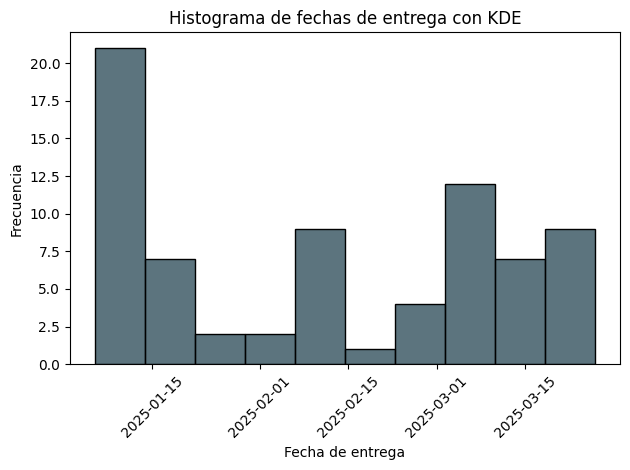

In [41]:
sns.histplot(
    data=sitio, 
    x='delivery_date', 
    bins=10, 
    #rwidth=0.9, 
    color='#264653', 
    edgecolor='black', 
    #kde=True
)

plt.xticks(rotation=45)
plt.xlabel('Fecha de entrega')
plt.ylabel('Frecuencia')
plt.title('Histograma de fechas de entrega con KDE')
plt.tight_layout()
plt.show()

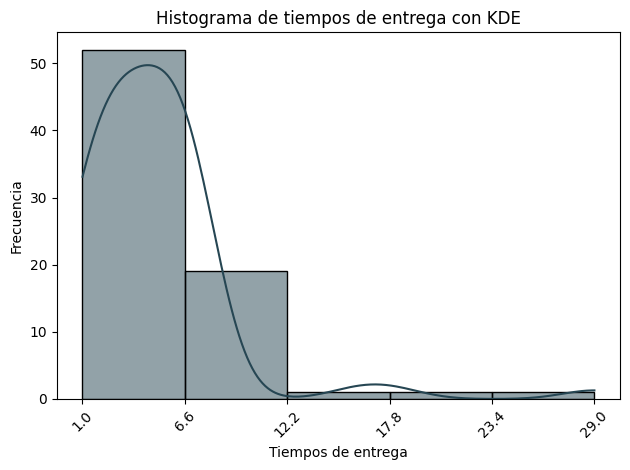

In [42]:
# Calcular los bordes de los bins
edges = np.histogram_bin_edges(sitio['delivery_time'], bins=5)

# Graficar el histograma
sns.histplot(
    data=sitio, 
    x='delivery_time', 
    bins=edges,  # usa los bordes exactos
    color='#264653', 
    edgecolor='black', 
    kde=True
)

# Ajustar los xticks para que coincidan con los bordes
plt.xticks(edges, rotation=45)
plt.xlabel('Tiempos de entrega')
plt.ylabel('Frecuencia')
plt.title('Histograma de tiempos de entrega con KDE')
plt.tight_layout()
plt.show()


## Analizar los servicios realizados en el laboratorio

In [43]:
lab = temp[temp['service_location'] == 'LAB']

### Análisis de tendencias en los servicios de laboratorios

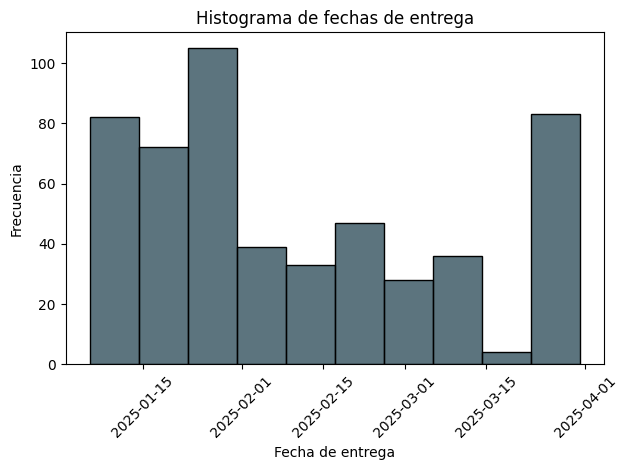

In [44]:
sns.histplot(
    data=lab, 
    x='delivery_date', 
    bins=10, 
    #rwidth=0.9, 
    color='#264653', 
    edgecolor='black', 
    #kde=True
)

plt.xticks(rotation=45)
plt.xlabel('Fecha de entrega')
plt.ylabel('Frecuencia')
plt.title('Histograma de fechas de entrega')
plt.tight_layout()
plt.show()

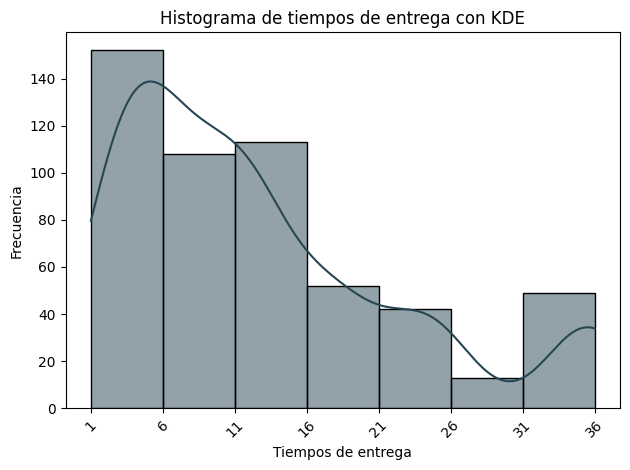

In [45]:
# Calcular los bordes de los bins
edges = np.histogram_bin_edges(lab['delivery_time'], bins=7)

# Graficar el histograma
sns.histplot(
    data=lab, 
    x='delivery_time', 
    bins=edges,  # usa los bordes exactos
    color='#264653', 
    edgecolor='black', 
    kde=True
)

# Ajustar los xticks para que coincidan con los bordes
plt.xticks(edges, rotation=45)
plt.xlabel('Tiempos de entrega')
plt.ylabel('Frecuencia')
plt.title('Histograma de tiempos de entrega con KDE')
plt.tight_layout()
plt.show()


In [46]:
#lab_trend = lab.groupby('delivery_date')['report_number'].count().reset_index()
lab_trend = lab.groupby('delivery_date')['so'].nunique().reset_index()

fig = (px.line(lab_trend, x='delivery_date', y='so', title='Cantidad de órdenes de servicio por fecha de entrega',        
        labels={'delivery_date': 'Fecha de entrega', 'so': 'Cantidad de servicios'}, 
        width=1000, height=600, template='plotly+seaborn'))

'''fig = (px.line(lab_trend, x='delivery_date', y='report_number', title='Tendencia de mantenimientos por fecha de entrega',        
        labels={'delivery_date': 'Fecha de entrega', 'report_number': 'Cantidad de servicios'}, 
        width=1000, height=600, template='plotly+seaborn'))'''

fig.update_traces(
    hovertemplate='Días: %{x}<br>Cantidad de servicios: %{y:.2f}',
    mode='lines+markers',
    opacity=0.8
)

# Agregar anotaciones en cada punto
for _, row in lab_trend.iterrows():
    fig.add_annotation(
        x=row['delivery_date'],  # Usar la fecha real, no el índice
        #y=row['report_number'],
        y=row['so'],
        #text=str(row['report_number']),  # Eliminar decimales
        text=str(row['so']),
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#264653", size=12)
    )

fig.show()

In [47]:
# Generar ambas tendencias
lab_trend_so = lab.groupby('delivery_date')['so'].nunique().reset_index()
lab_trend_report = lab.groupby('delivery_date')['report_number'].count().reset_index()
lab_trend_time = lab.groupby('delivery_date')['delivery_time'].mean().reset_index()

# Crear figura con ambas líneas
fig = go.Figure()

# Línea 1: Cantidad de 'so' únicos
fig.add_trace(
    go.Scatter(
        x=lab_trend_so['delivery_date'],
        y=lab_trend_so['so'],
        mode='lines+markers',
        name='Servicios Únicos (SO)',
        line=dict(color='#1f77b4', width=2),
        hovertemplate='Fecha: %{x}<br>Servicios Únicos: %{y}'
    )
)

# Línea 2: Cantidad de reportes
fig.add_trace(
    go.Scatter(
        x=lab_trend_report['delivery_date'],
        y=lab_trend_report['report_number'],
        mode='lines+markers',
        name='Total Servicios (Reportes)',
        line=dict(color='#ff7f0e', width=2),
        hovertemplate='Fecha: %{x}<br>Total Servicios: %{y}'
    )
)

# Línea 3: Tiempo promedio
fig.add_trace(
    go.Scatter(
        x=lab_trend_time['delivery_date'],
        y=lab_trend_time['delivery_time'],
        mode='lines+markers',
        name='Tiempo promedio',
        line=dict(color='#ff1f0e', width=2),
        hovertemplate='Fecha: %{x}<br>Total Servicios: %{y}'
    )
)

# Personalizar el gráfico
fig.update_layout(
    title='Tendencia de mantenimientos por fecha de entrega',
    xaxis_title='Fecha de entrega',
    yaxis_title='Cantidad de servicios',
    width=1000,
    height=600,
    template='plotly+seaborn',
    legend=dict(x=0.8, y=1)  # Posición de la leyenda
)


fig.show()

In [48]:
lab['Mes'] = lab['delivery_date'].dt.month_name(locale='es_ES')

lab_per_month = (lab.groupby('Mes').agg(
    so=('so', 'nunique'),
    rep_number=('report_number', 'count'),
    avg_delv_time=('delivery_time', 'mean')
))

if 'index' not in lab_per_month.columns:
    lab_per_month.reset_index(inplace=True)
    
lab_per_month.rename(columns={'so': 'Orden de Servicio', 'rep_number': 'Cantidad de servicios', 'avg_delv_time': 'Tiempo de entrega promedio'}, inplace=True)
lab_per_month

,Mes,Orden de Servicio,Cantidad de servicios,Tiempo de entrega promedio
0,Enero,67,259,18.621622
1,Febrero,61,134,6.895522
2,Marzo,60,136,7.632353


In [49]:
fig = go.Figure()

# ➤ Línea: tiempo de entrega promedio por mes
fig.add_trace(
    go.Scatter(
        x=lab_per_month['Mes'],
        y=lab_per_month['Tiempo de entrega promedio'],
        name='Tiempo de entrega promedio',
        mode='lines+markers',
        line=dict(color='#264653', width=3),
        marker=dict(size=8),
        yaxis='y1',
        hovertemplate='Mes: %{x}<br>Promedio: %{y:.2f} días'
    )
)

# ➤ Barras: cantidad de servicios por mes
fig.add_trace(
    go.Bar(
        x=lab_per_month['Mes'],
        y=lab_per_month['Orden de Servicio'],
        name='Cantidad de órdenes',
        marker_color='rgba(38, 70, 83, 0.4)',
        yaxis='y2',
        hovertemplate='Mes: %{x}<br>Órdenes: %{y}'
    )
)

fig.add_trace(
    go.Bar(
        x=lab_per_month['Mes'],
        y=lab_per_month['Cantidad de servicios'],
        name='Cantidad de informes',
        marker_color='rgba(28, 170, 83, 0.4)',
        yaxis='y2',
        hovertemplate='Mes: %{x}<br>Servicios: %{y}'
    )
)


# ➤ Ejes
fig.update_layout(
    title='Tiempo de entrega promedio y cantidad de informes por mes',
    xaxis=dict(title='Mes'),
    yaxis=dict(
        title='Tiempo de entrega promedio (días)',
        side='left'
    ),
    yaxis2=dict(
        title='Cantidad de informes',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    barmode='group',
    legend=dict(
        orientation='h', 
        x=0.51, y=0.99, 
        yanchor="bottom",
        xanchor="center",  # Centrado sobre el gráfico izquierdo
        bgcolor='rgba(255,255,255,0.8)'),
    width=900,
    height=800,
    template='plotly+seaborn'
)

# ➤ Anotaciones de los puntos de la línea
for i, row in lab_per_month.iterrows():
    fig.add_annotation(
        x=i,
        y=row['Tiempo de entrega promedio'],
        text=f"{row['Tiempo de entrega promedio']:.2f}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#264653", size=12),
        yanchor="bottom"
    )
    
# ➤ Anotaciones de las barras
for i, row in lab_per_month.iterrows():
    fig.add_annotation(
        x=i+0.2,
        y=row['Cantidad de servicios'],
        text=f"{row['Cantidad de servicios']:.0f}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#264653", size=12),
        yanchor="bottom"
    )
    
    # ➤ Anotaciones de las barras
for i, row in lab_per_month.iterrows():
    fig.add_annotation(
        x=i-0.2,
        y=row['Orden de Servicio'],
        text=f"{row['Orden de Servicio']:.0f}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#203523", size=12),
        yanchor="bottom"
    )

fig.show()


### Análisis por clasificaciones

In [50]:
lab_class = lab.groupby('classification')['report_number'].count().to_frame()

if 'index' not in lab_class.columns:
  lab_class.reset_index(inplace=True)
  lab_class.rename(columns={'classification': 'Clasificación', 'report_number': 'Cantidad'}, inplace=True)

lab_class.sort_values('Cantidad', ascending=False, inplace=True)


In [51]:
lab_class

,Clasificación,Cantidad
3,TLD,446
2,RTD,36
4,TLV,33
0,ESTUDIO TÉRMICO,13
1,MANTENIMIENTO,1


In [52]:
lab.loc[lab['assignee'] == 'Omar Cristobal Cruz, Ramiro Martínez Espinosa', 'assignee'] = 'Omar Cristobal Cruz'
lab.loc[lab['assignee'] == 'David Bautista Hernández, Gerardo Ramses Arellano Bolaz', 'assignee'] = 'David Bautista Hernández'

In [53]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear subgráficos
fig = make_subplots(
    rows=1, 
    cols=2,
    column_widths=[0.3, 0.6],
    vertical_spacing=0.05,
    specs=[[{"type": "bar"}, {"type": "pie"}]],
    subplot_titles=("Cantidad de Certificados por Mes", "Distribución de Servicios por Mes")
)

# Gráfico de Barras (con barra de color a la izquierda)
fig.add_trace(
    go.Bar(
        x=lab_class['Clasificación'],
        y=lab_class['Cantidad'],
        text=lab_class['Cantidad'],
        width=0.4,
        marker=dict(
            color=lab_class['Cantidad'],
            colorscale='RdBu',
            colorbar=dict(
                title="Certificados",
                x=0.32,  # Posición horizontal de la barra de color
                len=0.6   # Longitud de la barra de color
            )
        ),
        hovertemplate='<b>%{x}</b><br>Cantidad: %{y}<extra></extra>',
        showlegend=False  # No mostrar leyenda para este gráfico
    ), 
    row=1, 
    col=1
)

# Gráfico de Pie (con leyenda a la derecha)
colors2 = ["#0ea3df", "#0edf7d", "#01fce5", "#ff7f0e", "#2ca02c"]

fig.add_trace(
    go.Pie(
        labels=lab_class['Clasificación'],
        values=lab_class['Cantidad'],
        hole=0.3,
        textinfo='percent',
        hoverinfo='label+value',
        marker=dict(
            colors=colors2
        ),
        name="Servicios",  # Título de la leyenda
    ),
    row=1, 
    col=2
)

# Ajustar posición de leyendas y diseño
fig.update_layout(
    height=500,
    width=1150,  # Aumentar ancho para espacio
    template="plotly+seaborn",
    xaxis_title="Mes",
    yaxis_title="Certificados",
    legend=dict(
        x=0.87,    # Posición horizontal de la leyenda (derecha)
        y=0.5,     # Posición vertical (centro)
        traceorder="normal"
    ),
    coloraxis_colorbar=dict(
        x=0.35,    # Posición horizontal de la barra de color
        title_side="top"
    )
)

fig.show()

### Analizamos los mantenimientos teniendo en cuenta su clasificación y la comparativa con sus tiempos asignados y de entrega.

In [54]:
# Cantidad de informes por clasificación y asignado

lab_class_per_assignee = (lab.groupby(['classification', 'assignee'])['report_number']
                          .count()
                          .unstack()
                          .fillna(0)
                          )

# Cantidad de órdenes de servicio por clasificación y asignado

lab_class_per_assignee_so = (lab.groupby(['classification', 'assignee'])['so']
                          .nunique()
                          .unstack()
                          .fillna(0)
                          )

In [55]:
# Desempaquetar el DataFrame para obtener las columnas individuales y preparar los datos para la visualización
lab_class_per_assignee_melted = lab_class_per_assignee.reset_index().melt(id_vars=['classification'], var_name='assignee', value_name='0')
lab_class_per_assignee_melted.rename(columns={'classification': 'Clasificación', 'assignee': 'Asignado a', '0': 'Cantidad'}, inplace=True)

lab_class_per_assignee_melted

,Clasificación,Asignado a,Cantidad
0,ESTUDIO TÉRMICO,David Bautista Hernández,0.0
1,MANTENIMIENTO,David Bautista Hernández,0.0
2,RTD,David Bautista Hernández,0.0
3,TLD,David Bautista Hernández,17.0
4,TLV,David Bautista Hernández,0.0
5,ESTUDIO TÉRMICO,Dulce María Ramírez Contla,0.0
6,MANTENIMIENTO,Dulce María Ramírez Contla,0.0
7,RTD,Dulce María Ramírez Contla,13.0
8,TLD,Dulce María Ramírez Contla,33.0
9,TLV,Dulce María Ramírez Contla,3.0


In [56]:
# Desempaquetar el DataFrame para obtener las columnas individuales y preparar los datos para la visualización
lab_class_per_assignee_so_melted = lab_class_per_assignee_so.reset_index().melt(id_vars=['classification'], var_name='assignee', value_name='0')
lab_class_per_assignee_so_melted.rename(columns={'classification': 'Clasificación', 'assignee': 'Asignado a', '0': 'Cantidad SO'}, inplace=True)

lab_class_per_assignee_so_melted

,Clasificación,Asignado a,Cantidad SO
0,ESTUDIO TÉRMICO,David Bautista Hernández,0.0
1,MANTENIMIENTO,David Bautista Hernández,0.0
2,RTD,David Bautista Hernández,0.0
3,TLD,David Bautista Hernández,8.0
4,TLV,David Bautista Hernández,0.0
5,ESTUDIO TÉRMICO,Dulce María Ramírez Contla,0.0
6,MANTENIMIENTO,Dulce María Ramírez Contla,0.0
7,RTD,Dulce María Ramírez Contla,13.0
8,TLD,Dulce María Ramírez Contla,13.0
9,TLV,Dulce María Ramírez Contla,2.0


In [57]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Filtrar valores > 0
lab_filtrado = lab_class_per_assignee_melted[lab_class_per_assignee_melted['Cantidad'] > 0]
lab_filtrado_so = lab_class_per_assignee_so_melted[lab_class_per_assignee_so_melted['Cantidad SO'] > 0]

# Colores fijos por persona
colores = px.colors.qualitative.Plotly
personas = sorted(lab_filtrado['Asignado a'].unique())
color_map = {persona: colores[i % len(colores)] for i, persona in enumerate(personas)}

# Crear figura con subplots
fig = make_subplots(
    rows=1, cols=2,
    shared_yaxes=True,
    column_widths=[0.5, 0.5],
    subplot_titles=("Informes por clasificación", "Órdenes de Servicio por clasificación")
)

# Gráfico 1: Informes
for nombre in personas:
    df_temp = lab_filtrado[lab_filtrado['Asignado a'] == nombre]
    fig.add_trace(
        go.Bar(
            x=df_temp['Clasificación'],
            y=df_temp['Cantidad'],
            name=nombre,
            text=df_temp['Cantidad'],
            textposition='outside',
            marker_color=color_map[nombre]
        ),
        row=1, col=1
    )

# Gráfico 2: Órdenes de Servicio
for nombre in personas:
    df_temp = lab_filtrado_so[lab_filtrado_so['Asignado a'] == nombre]
    fig.add_trace(
        go.Bar(
            x=df_temp['Clasificación'],
            y=df_temp['Cantidad SO'],
            name=nombre,
            text=df_temp['Cantidad SO'],
            textposition='outside',
            marker_color=color_map[nombre],
            showlegend=False  # Evita duplicar la leyenda
        ),
        row=1, col=2
    )

fig.update_layout(
    #title="Servicios por clasificación y asignado",
    legend_title='Asignado a',
    barmode='group',
    bargap=0.2,
    height=800,
    width=1150,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.1,
        xanchor='center',
        x=0.5
    )
)

# Títulos individuales de los ejes X (porque son subplots)
fig.update_xaxes(title_text='Clasificación', row=1, col=1)
fig.update_xaxes(title_text='Clasificación', row=1, col=2)

# Título eje Y (es compartido)
fig.update_yaxes(title_text='Cantidad', row=1, col=1)

fig.show()


In [58]:
df1 = maint.reset_index().sort_values('total_pieces', ascending=False)
df2 = maintenance_time.reset_index().sort_values('assigned_time', ascending=False)

# Crear figura con 1 fila y 2 columnas
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"secondary_y": True}, {"secondary_y": True}]],
    column_widths=[0.5, 0.5],
    horizontal_spacing=0.1,
    subplot_titles=(
        "Comparación de reportes y piezas", 
        "Tiempo de entrega vs tiempo asignado"
    )
)

# ==============================================
# PRIMER GRÁFICO (IZQUIERDA)
# ==============================================
# Barras para cantidad de reportes
fig.add_trace(
    go.Bar(
        x=df1['classification'],
        y=df1['rep_qty'],
        name='Reportes',
        marker_color='#66b3ff',
        text=[f'{val:.0f}' for val in df1['rep_qty']],
        textposition='outside',
        width=0.4,
        hovertemplate=(
            '<b>Clasificación:</b> %{x}<br>'
            '<b>Reportes:</b> %{y:.0f}<extra></extra>'
        )
    ),
    row=1, col=1, secondary_y=False
)

# Barras para cantidad de piezas
fig.add_trace(
    go.Bar(
        x=df1['classification'],
        y=df1['total_pieces'],
        name='Piezas',
        marker_color='#99ff99',
        text=[f'{val:.0f}' for val in df1['total_pieces']],
        textposition='outside',
        width=0.4,
        hovertemplate=(
            '<b>Clasificación:</b> %{x}<br>'
            '<b>Piezas:</b> %{y:.0f}<extra></extra>'
        )
    ),
    row=1, col=1, secondary_y=False
)

# Línea para tiempo de entrega promedio
fig.add_trace(
    go.Scatter(
        x=df1['classification'],
        y=df1['deliv_time_avg'],
        mode='lines+markers',
        name='Tiempo Entrega',
        line=dict(color='black', dash='dash'),
        marker=dict(symbol='circle', size=8),
        hovertemplate=(
            '<b>Clasificación:</b> %{x}<br>'
            '<b>Tiempo:</b> %{y:.1f} días<extra></extra>'
        )
    ),
    row=1, col=1, secondary_y=True
)

# ==============================================
# SEGUNDO GRÁFICO (DERECHA)
# ==============================================
# Barras tiempo de entrega
fig.add_trace(
    go.Bar(
        x=df2['classification'],
        y=df2['delivery_time'],
        name='Entrega',
        marker_color='#0e56cd',
        text=[f'{val:.1f}' for val in df2['delivery_time']],
        textposition='outside',
        width=0.4,
        hovertemplate=(
            '<b>Clasificación:</b> %{x}<br>'
            '<b>Tiempo Entrega:</b> %{y:.1f}<extra></extra>'
        )
    ),
    row=1, col=2, secondary_y=False
)

# Barras tiempo asignado
fig.add_trace(
    go.Bar(
        x=df2['classification'],
        y=df2['assigned_time'],
        name='Asignado',
        marker_color='#21c321',
        text=[f'{val:.1f}' for val in df2['assigned_time']],
        textposition='outside',
        width=0.4,
        hovertemplate=(
            '<b>Clasificación:</b> %{x}<br>'
            '<b>Tiempo Asignado:</b> %{y:.1f}<extra></extra>'
        )
    ),
    row=1, col=2, secondary_y=False
)

# Línea promedio de piezas
fig.add_trace(
    go.Scatter(
        x=df2['classification'],
        y=df2['piece_count'],
        mode='lines+markers',
        name='Piezas',
        line=dict(color='black', dash='dot'),
        marker=dict(symbol='diamond', size=8),
        hovertemplate=(
            '<b>Clasificación:</b> %{x}<br>'
            '<b>Promedio Piezas:</b> %{y:.1f}<extra></extra>'
        )
    ),
    row=1, col=2, secondary_y=True
)

# ==============================================
# ANOTACIONES PARA RAZONES
# ==============================================
annotations = []
for i, row in df1.iterrows():
    if row['rep_qty'] > 0:  # Evitar división por cero
        ratio = row['total_pieces'] / row['rep_qty']
        if ratio > 1:
            annotations.append(dict(
                x=row['classification'],
                y=max(row['rep_qty'], row['total_pieces']),
                xref="x1",
                yref="y1",
                text=f'Razón: {ratio:.2f}',
                showarrow=True,
                arrowhead=3,
                font=dict(color='red'),
                ax=20,
                ay=-30
            ))

# ==============================================
# CONFIGURACIÓN FINAL
# ==============================================
fig.update_layout(
    height=600,
    width=1200,
    barmode='group',
    annotations=annotations,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.1,
        xanchor="center",
        x=0.5
    ),
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    ),
    margin=dict(t=100, b=150),  # Margen aumentado para ejes
    xaxis=dict(tickangle=-30),  # Inclinación etiquetas eje X
    xaxis2=dict(tickangle=-30)  # Inclinación para segundo gráfico
)

# Configurar ejes X
fig.update_xaxes(
    title_text="Clasificación del Equipo",
    showticklabels=True,
    row=1, 
    col=1,
    tickfont=dict(size=12)
)

fig.update_xaxes(
    title_text="Clasificación del Equipo",
    showticklabels=True,
    row=1, 
    col=2,
    tickfont=dict(size=12)
)

# Configurar ejes Y
fig.update_yaxes(title_text="Cantidad", secondary_y=False, row=1, col=1)
fig.update_yaxes(title_text="Tiempo (días)", secondary_y=True, row=1, col=1)
fig.update_yaxes(title_text="Tiempo", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Piezas", secondary_y=True, row=1, col=2)

# Título general
fig.add_annotation(
    text="Análisis de Mantenimientos",
    xref="paper",
    yref="paper",
    x=0.5,
    y=1.25,
    showarrow=False,
    font=dict(size=20, color='black')
)

fig.show()

NameError: name 'maint' is not defined

## ✅ Eficiencia en los Tiempos de Entrega

- En la mayoría de los casos, se completan los servicios de mantenimiento en un tiempo considerablemente menor al que se les asigna.  
- Esto indica que el laboratorio opera con holgura en su planificación, lo cual puede verse como una oportunidad para **optimizar los tiempos asignados y mejorar la eficiencia operativa**.  
- Reducir los márgenes conservadores en la planificación puede liberar recursos y permitir una mayor capacidad de atención.

---

## ✅ Análisis por Categoría de Pesas: M1 y M2

- **M1:**  
  - Es la categoría con mayor número de informes (61), representando una alta demanda.  
  - En promedio, cada informe incluye unas **2.46 pesas**, lo que sugiere que se manejan volúmenes moderados por servicio.  
  - Esto permite una atención ágil y constante por parte del personal técnico.

- **M2:**  
  - Aunque tiene menos informes, cada uno involucra un volumen considerablemente mayor, con un **promedio de 12.80 pesas por servicio**.  
  - Este comportamiento sugiere una mayor complejidad técnica, que justifica los tiempos asignados.  
  - Aun así, los tiempos reales de entrega no se ven comprometidos, lo cual demuestra **una buena capacidad de respuesta ante solicitudes más complejas**.

---

## ✅ Oportunidades de Mejora en la Planificación

- Dado que el tiempo efectivo es consistentemente menor que el tiempo asignado, **se evidencia una subutilización de recursos**.  
- Esto abre la puerta a una redistribución más eficiente del personal o a la **posibilidad de atender más órdenes sin comprometer la calidad**.  
- Ajustar los tiempos asignados a la realidad observada contribuiría a una planificación más precisa y menos conservadora.

---

## 💡 Recomendaciones Estratégicas

1. **Revisar los Tiempos Asignados por Tipo de Categoría:**  
   Evaluar si es viable reducirlos para mejorar la rotación de servicios.

2. **Analizar la Relación entre Volumen de Pesas y Tiempo de Entrega:**  
   Confirmar si el número de pesas enviadas por los clientes influye significativamente en el desempeño del laboratorio, principalmente con los servicios de calibración.

3. **Centralizar Procesos en Casos de Alta Carga (como M2):**  
   Dado que estas órdenes manejan muchas pesas, podría ser útil desarrollar flujos especializados para mantener la eficiencia.

4. **Monitoreo Continuo de Indicadores Operativos:**  
   Implementar dashboards o reportes periódicos para vigilar tiempos de entrega y carga de trabajo por categoría.

---

## 📌 Conclusión General

El laboratorio de calibración de masa muestra una **alta eficiencia operativa**, cumpliendo los servicios en menos tiempo del previsto incluso cuando se manejan grandes volúmenes de pesas por informe. A pesar de las diferencias en complejidad entre categorías, los tiempos de entrega se mantienen estables. Existe margen para **ajustar la planificación y aumentar la productividad sin comprometer la calidad del servicio**.


# Realizar el análisis de las calibraciones

### Eliminamos todos los reportes que no son calibraciones

In [ ]:
# Se eliminan las filas que no son calibraciones
mass_cal = mass[~mass['report_number'].str.startswith('RSM', na=False)]

In [ ]:
# Analizamos la información de la tabla
mass_cal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 0 to 387
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            388 non-null    object        
 1   so                       388 non-null    object        
 2   assignee                 388 non-null    object        
 3   calibrator               388 non-null    object        
 4   supervisor               388 non-null    object        
 5   approver                 388 non-null    object        
 6   classification           388 non-null    object        
 7   lab_received_date        388 non-null    datetime64[ns]
 8   scheduled_delivery_date  383 non-null    datetime64[ns]
 9   cleaning_date            382 non-null    datetime64[ns]
 10  calibration_date         388 non-null    datetime64[ns]
 11  delivery_date            388 non-null    datetime64[ns]
 12  delivery_time            388 non-null    

In [ ]:
mass_cal.isnull().sum()

report_number                0
so                           0
assignee                     0
calibrator                   0
supervisor                   0
approver                     0
classification               0
lab_received_date            0
scheduled_delivery_date      5
cleaning_date                6
calibration_date             0
delivery_date                0
delivery_time                0
process_status               0
assigned_time                0
service_location             0
substitution_reason        365
lab_observations           337
priority                     0
piece_count                  0
year_received                0
month_received               0
week_received                0
year_delivery                0
month_delivery               0
week_delivery                0
service_type                 0
equipment_type               0
dtype: int64

# Análisis del DataFrame

**📌 Estructura General**  
- **386 registros** | **28 columnas** 
**🔍 Hallazgos Clave**  
1. **Variables Temporales** (completas en su mayoría):  
   - `delivery_time` (tiempo de entrega) y `assigned_time` - **0 nulos**  
   - Fechas críticas (`lab_received_date`, `calibration_date`, `delivery_date`) - **100% completas**  
   - `scheduled_delivery_date` y `cleaning_date` - **5-6 nulos**  

2. **Columnas con Datos Faltantes**:  
   - `substitution_reason` (94% nulos) y `lab_observations` (87% nulos) - **Considerar eliminar o imputar**  

3. **Variables Categóricas Relevantes**:  
   - `classification`, `priority`, `service_type`, `equipment_type` - **0 nulos**  
   - Útiles para segmentación (ej: análisis por tipo de equipo o prioridad).  

**⚠️ Siguientes acciones**  
- Limpieza mínima: Revisar filas con `scheduled_delivery_date` nulo.  
- Enfoque analítico: **`delivery_time` vs categorías** (prioridad, tipo de servicio).  
- Columnas opcionales: `substitution_reason` y `lab_observations` aportan poco valor.  


# Análisis de los errores de sustitución antes de realizar el análisis de las calibraciones

In [ ]:
# Obtenemos la cantidad de reportes por cada razón de sustitución
subs_reason = mass_cal.groupby('substitution_reason')['report_number'].count().sort_values(ascending=False)
subs_reason


substitution_reason
Solicitud del cliente           14
Error de laboratorio             6
Error del área comercial         2
Error de atención al cliente     1
Name: report_number, dtype: int64

### Se comparan los distintos tipos de errores de sustitución

In [ ]:
import plotly.express as px

# Asumimos que subs_reason ya está definido
# Calcular el total de sustituciones
total = len(mass_cal['report_number'].unique())

# Calcular los porcentajes
percentages = [(v / total) * 100 for v in subs_reason.values]

# Creamos el gráfico de barras horizontales con la misma estética
fig = px.bar(
    subs_reason,
    x=subs_reason.values,
    y=subs_reason.index,
    orientation='h',
    color=subs_reason.values,  # Esto activa el gradiente
    color_continuous_scale=['#2ca25f', '#66c2a4', '#41b6c4', '#2b8cbe'],  # Escala de verde a azul
    title='Razones de sustitución por tipo'
)

# Configurar el diseño para que sea idéntico al de la imagen
fig.update_layout(
    width=800,
    height=500,
    xaxis_title='Cantidad de sustituciones',
    yaxis_title='Tipo de sustitución',
    plot_bgcolor='white',
    margin=dict(l=150, r=50, t=80, b=80),
    coloraxis_colorbar=dict(
        title='Cantidad',
        len=0.8
    )
)

# Eliminar las anotaciones automáticas de valores si existen
fig.update_traces(texttemplate='', hovertemplate='<b>%{y}</b><br>Cantidad: %{x}<extra></extra>')  # Formato del hover)

# Añadir solo los porcentajes donde están los círculos rojos
for i, (valor, porcentaje) in enumerate(zip(subs_reason.values, percentages)):
    fig.add_annotation(
        x=valor + 0.5,
        y=i,
        text=f"{porcentaje:.1f}%",  # Solo el porcentaje con un decimal
        showarrow=False,
        font=dict(size=12),
        xanchor="center",
        yanchor="middle"
    )

# Mostrar el gráfico
fig.show()

# Análisis de Sustituciones en Masa

**📊 Porcentaje de sustituciones**:
- **Total de sustituciones**: 6.39% del total de informes de calibraciones.

**📊 Distribución de Causas**:
- **Principal motivo**: Solicitud del cliente (3.80% del total de informes de calibraciones (máximo))
- **Errores menores**: 
  - Área de atención al cliente (máx 0.27% del total de informes de calibraciones) 


1. **Prioridad de Acción**:
   - Enfocarse en **solicitudes de clientes** (frecuencia alta).


**📌 Recomendación**: **Las razones de sustitución por solicitudes del cliente puede indicar que falta claridad al momento de captar los requerimientos que el cliente necesita, por lo que se recomienda optimizar el proceso en cuestión.**

## Tipos de errores vs Clasificación de equipo

In [ ]:
# 1. Crear una copia del DataFrame para preservar los datos originales
df_temp = mass_cal.copy()

# 2. Identificar errores no clasificados (NaN)
df_temp['classification'] = df_temp['classification'].fillna('No clasificado')  # Renombrar NaN

# 3. Agrupar incluyendo la nueva categoría
errores_por_classification = (
    df_temp.groupby(['classification', 'substitution_reason'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
)

# 4. Calcular el TOTAL correcto (suma de razones)
columnas_errores = errores_por_classification.columns.difference(['classification'])
errores_por_classification['Total'] = errores_por_classification[columnas_errores].sum(axis=1)

# 5. Ordenar y mostrar
errores_por_classification = errores_por_classification.sort_values('Total', ascending=False)
errores_por_classification

substitution_reason,classification,Error de atención al cliente,Error de laboratorio,Error del área comercial,Solicitud del cliente,Total
0,E2,1,3,2,7,13
1,F1,0,3,0,5,8
2,M2,0,0,0,2,2


In [ ]:
epc = errores_por_classification.drop(columns='Total', errors='ignore')
errores_por_classification_melted = epc.melt(
    id_vars=['classification'],
    var_name='Motivo de sustitución',
    value_name='Cantidad'   
)
errores_por_classification_melted

,classification,Motivo de sustitución,Cantidad
0,E2,Error de atención al cliente,1
1,F1,Error de atención al cliente,0
2,M2,Error de atención al cliente,0
3,E2,Error de laboratorio,3
4,F1,Error de laboratorio,3
5,M2,Error de laboratorio,0
6,E2,Error del área comercial,2
7,F1,Error del área comercial,0
8,M2,Error del área comercial,0
9,E2,Solicitud del cliente,7


### Se comparan los distintos tipos de errores de sustitución por clasificación de equipo

In [ ]:
# Total por clasificación para el gráfico de pastel
totales_por_clasificacion = errores_por_classification_melted.groupby('classification')['Cantidad'].sum().reset_index()

# Datos agrupados para la barra apilada
df_bar = errores_por_classification_melted.groupby(['classification', 'Motivo de sustitución'])['Cantidad'].sum().reset_index()

# Paleta personalizada de 4 colores en tonos verdiazules
color_sequence = ['#2ca25f', '#66c2a4', '#41b6c4', '#2b8cbe']

# Obtener los motivos de sustitución
motivos = df_bar['Motivo de sustitución'].unique()

# Asignar un color a cada motivo (si hay más motivos que colores, se ciclará la paleta)
color_dict = {motivo: color_sequence[i % len(color_sequence)] for i, motivo in enumerate(motivos)}

# ----- Crear Figura con Subplots -----
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.4, 0.6],
    specs=[[{"type": "domain"}, {"type": "xy"}]],
    subplot_titles=("Distribución de errores por clasificación", "Errores por motivo de sustitución")
)

# ----- Agregar Gráfico de Pastel -----
fig.add_trace(go.Pie(
    labels=totales_por_clasificacion['classification'],
    values=totales_por_clasificacion['Cantidad'],
    hole=0.3,
    marker=dict(
        # Asigna colores a cada clasificación a partir de la paleta (se utiliza el mismo orden de la paleta)
        colors=[color_sequence[i % len(color_sequence)] for i in range(len(totales_por_clasificacion))]
    ),
    hovertemplate=(
        '<b>Clasificación:</b> %{label}<br>' +
        '<b>Total Errores:</b> %{value}<br>' +
        '<b>Porcentaje:</b> %{percent:.1%}<extra></extra>'
    ),
    textinfo='percent',
    textposition='outside',
    showlegend=True
), row=1, col=1)

# ----- Agregar Gráfico de Barras Apiladas -----
for motivo in motivos:
    df_filtrado = df_bar[df_bar['Motivo de sustitución'] == motivo]
    fig.add_trace(go.Bar(
        x=df_filtrado['classification'],
        y=df_filtrado['Cantidad'],
        name=motivo,
        marker_color=color_dict[motivo],
        hovertemplate=(
            '<b>Clasificación:</b> %{x}<br>' +
            f'<b>Motivo:</b> {motivo}<br>' +
            '<b>Cantidad:</b> %{y}<extra></extra>'
        ),
    ), row=1, col=2)

# ----- Actualizar Layout General -----
fig.update_layout(
    barmode='stack',
    title_text="Análisis de Errores por Clasificación y Motivo de Sustitución",
    template='seaborn',
    height=500,
    width=1000,
    # Posicionar la leyenda para que se muestre completa
    legend=dict(
        title_text='<b>Leyenda Completa</b>',
        yanchor="top",
        y=0.95,
        xanchor="left",
        x=1.02,
        traceorder='normal'
    ),
    margin=dict(r=300)
)

fig.show()


## 📌 Hallazgo Principal
**Las pesas E2 son la clasificación más crítica**, representando:
- **13 sustituciones totales** (entre ellas 7 por solicitud del cliente y 3 por errores de laboratorio)
- Esto equivale al **56.52% del total de sustituciones** 

### Clasificación por metrólogo y tipos de errores

In [ ]:
# Agrupar por 'assignee' y contar errores por tipo de 'substitution_reason'
errores_por_assignee = (
    mass_cal.groupby(['assignee', 'substitution_reason'])  # Agrupar por persona y tipo de error
        .size()                                   # Contar ocurrencias
        .unstack(fill_value=0)                    # Convertir a formato tabla
        .reset_index()                            # Convertir índice a columna
)

# Ordenar por el total de errores (opcional)
errores_por_assignee['Total'] = errores_por_assignee.count(axis=1)
errores_por_assignee = errores_por_assignee.sort_values('Total', ascending=False).drop('Total', axis=1)

# Mostrar resultado
errores_por_assignee

substitution_reason,assignee,Error de atención al cliente,Error de laboratorio,Error del área comercial,Solicitud del cliente
0,Eva María Arévalo Jiménez,1,0,0,8
1,Francisco Torres Cabrera,0,3,1,0
2,Gabriel Gallardo Camacho,0,0,0,2
3,Guillermo Guzmán López,0,0,0,2
4,Leobardo Maximiliano Brito Fonseca,0,2,1,0
5,Mario de Jesús García,0,1,0,2


In [ ]:
errores_por_assignee_melted = errores_por_assignee.melt(id_vars='assignee', value_vars=['Error de atención al cliente', 'Error de laboratorio', 'Error del área comercial', 'Solicitud del cliente'], var_name='Motivo de sustitución', value_name='Cantidad')
errores_por_assignee_melted

,assignee,Motivo de sustitución,Cantidad
0,Eva María Arévalo Jiménez,Error de atención al cliente,1
1,Francisco Torres Cabrera,Error de atención al cliente,0
2,Gabriel Gallardo Camacho,Error de atención al cliente,0
3,Guillermo Guzmán López,Error de atención al cliente,0
4,Leobardo Maximiliano Brito Fonseca,Error de atención al cliente,0
5,Mario de Jesús García,Error de atención al cliente,0
6,Eva María Arévalo Jiménez,Error de laboratorio,0
7,Francisco Torres Cabrera,Error de laboratorio,3
8,Gabriel Gallardo Camacho,Error de laboratorio,0
9,Guillermo Guzmán López,Error de laboratorio,0


In [ ]:
# Total por clasificación para el gráfico de pastel
totales_por_asignado = errores_por_assignee_melted.groupby('Motivo de sustitución')['Cantidad'].sum().reset_index()

# Datos agrupados para la barra apilada
df_bar = errores_por_assignee_melted.groupby(['assignee', 'Motivo de sustitución'])['Cantidad'].sum().reset_index()

# Paleta personalizada de 4 colores en tonos verdiazules
color_sequence = ['#2ca25f', '#f1290d', '#41b6c4', '#2b8cbe']

# Obtener los motivos de sustitución
motivos = df_bar['Motivo de sustitución'].unique()

# Asignar un color a cada motivo (si hay más motivos que colores, se ciclará la paleta)
color_dict = {motivo: color_sequence[i % len(color_sequence)] for i, motivo in enumerate(motivos)}

# ----- Crear Figura con Subplots -----
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.4, 0.6],
    specs=[[{"type": "domain"}, {"type": "xy"}]],
    subplot_titles=("Motivos de sustitución de informes", "Distribuciónn de sustituciones por metrólogo")
)

# ----- Agregar Gráfico de Pastel -----
fig.add_trace(go.Pie(
    labels=totales_por_asignado['Motivo de sustitución'],
    values=totales_por_asignado['Cantidad'],
    pull=[0, 0.1, 0, 0],
    hole=0.3,
    marker=dict(
        # Asigna colores a cada clasificación a partir de la paleta (se utiliza el mismo orden de la paleta)
        colors=[color_sequence[i % len(color_sequence)] for i in range(len(totales_por_clasificacion))]
    ),
    hovertemplate=(
        '<b>Clasificación:</b> %{label}<br>' +
        '<b>Total Errores:</b> %{value}<br>' +
        '<b>Porcentaje:</b> %{percent:.1%}<extra></extra>'
    ),
    textinfo='percent',
    textposition='outside',
    showlegend=True
), row=1, col=1)

# ----- Agregar Gráfico de Barras Apiladas -----
for motivo in motivos:
    df_filtrado = df_bar[df_bar['Motivo de sustitución'] == motivo]
    fig.add_trace(go.Bar(
        x=df_filtrado['assignee'],
        y=df_filtrado['Cantidad'],
        name=motivo,
        marker_color=color_dict[motivo],
        hovertemplate=(
            '<b>Metrólogo:</b> %{x}<br>' +
            f'<b>Motivo:</b> {motivo}<br>' +
            '<b>Cantidad:</b> %{y}<extra></extra>'
        ),
    ), row=1, col=2)

# ----- Actualizar Layout General -----
fig.update_layout(
    barmode='stack',
    title_text="Sustitución de informes por metrólogos y motivos",
    template='seaborn',
    height=500,
    width=1000,
    # Posicionar la leyenda para que se muestre completa
    legend=dict(
        title_text='<b>Leyenda Completa</b>',
        yanchor="top",
        y=0.95,
        xanchor="left",
        x=1.02,
        traceorder='normal'
    ),
    margin=dict(r=300)
)

fig.show()


# Resumen: Análisis de Errores por Clasificación y Motivo de Sustitución

## Distribución General  
- **60.9%**: Solicitud del cliente (principal motivo)  
- **26.1%**: Error de laboratorio  
- **8.7%**: Error del área comercial  
- **4.35%**: Error de atención al cliente  

## Análisis por Personal  
En lo que al laboratorio concierne, las sustituciones que impactan en la calibración por parte del laboratorio son las "Sustituciones por error del laboratorio", estas se reparten de la siguiente forma:
- **Francisco Torres Cabrera**: 3 errores
- **Leobardo Maximiliano Brito Fonseca**: 2 errores
- **Mario de Jesús García**: 1 error

## Recomendaciones
- Mejorar proceso de toma de requisitos iniciales con clientes  
- Implementar medidas correctivas en laboratorio (26.1% de errores)  
- Proporcionar capacitación específica al personal según sus patrones de error  

#### Eliminar las filas que contienen los informes que corresponden a las sustituciones por errores

In [ ]:
# Eliminar las filas que contienen errores de sustitución
mass_sin_errores = df_temp.drop(df_temp[df_temp['substitution_reason'].notna()].index, errors='ignore')

In [ ]:
mass_sin_errores = mass_sin_errores.drop(columns=['substitution_reason'], errors='ignore')
mass_sin_errores.head(10)

,report_number,so,assignee,calibrator,supervisor,approver,classification,lab_received_date,scheduled_delivery_date,cleaning_date,...,priority,piece_count,year_received,month_received,week_received,year_delivery,month_delivery,week_delivery,service_type,equipment_type
0,CCM0001.M/2025,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,ORDINARIO,1.0,2024,12,49,2025,1,2,Calibración,Pesa
1,CCM0002.M/2025,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,ORDINARIO,1.0,2024,12,49,2025,1,2,Calibración,Pesa
2,CCM0003.M/2025,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,ORDINARIO,1.0,2024,12,49,2025,1,2,Calibración,Pesa
3,CCM0004.M/2025,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,ORDINARIO,1.0,2024,12,49,2025,1,2,Calibración,Pesa
4,CCM0005.M/2025 v0,I0082,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2025-01-21,2025-01-31,2025-01-21,...,ORDINARIO,1.0,2025,1,4,2025,1,5,Calibración,Pesa
5,CCM0005.M/2025 v1,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,ORDINARIO,1.0,2024,12,49,2025,1,2,Calibración,Pesa
6,CCM0006.M/2025,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,ORDINARIO,1.0,2024,12,49,2025,1,2,Calibración,Pesa
7,CCM0007.M/2025,H2395,Francisco Torres Cabrera,Francisco Torres Cabrera,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,E2,2024-12-06,2025-01-08,2024-12-06,...,ORDINARIO,22.0,2024,12,49,2025,1,2,Calibración,Pesa
8,CCM0008.M/2025,H2403,Guillermo Guzmán López,Guillermo Guzmán López,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,M1,2024-12-09,2025-01-06,2025-01-02,...,ORDINARIO,4.0,2024,12,50,2025,1,2,Calibración,Pesa
9,CCM0009.M/2025,H2403,Guillermo Guzmán López,Guillermo Guzmán López,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,M1,2024-12-09,2025-01-06,2025-01-02,...,ORDINARIO,3.0,2024,12,50,2025,1,2,Calibración,Pesa


In [ ]:
mass_sin_errores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 387
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            365 non-null    object        
 1   so                       365 non-null    object        
 2   assignee                 365 non-null    object        
 3   calibrator               365 non-null    object        
 4   supervisor               365 non-null    object        
 5   approver                 365 non-null    object        
 6   classification           365 non-null    object        
 7   lab_received_date        365 non-null    datetime64[ns]
 8   scheduled_delivery_date  360 non-null    datetime64[ns]
 9   cleaning_date            359 non-null    datetime64[ns]
 10  calibration_date         365 non-null    datetime64[ns]
 11  delivery_date            365 non-null    datetime64[ns]
 12  delivery_time            365 non-null    

In [ ]:
# Eliminamos las columnas que no son necesarias
mass_sin_errores = mass_sin_errores.drop(columns=['substitution_reason', 'service_type', 'lab_observations', 'process_status'], errors='ignore')

# Verificamos nuevamente los tipos de datos de cada columna y la cantidad de datos nulos
mass_sin_errores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 387
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            365 non-null    object        
 1   so                       365 non-null    object        
 2   assignee                 365 non-null    object        
 3   calibrator               365 non-null    object        
 4   supervisor               365 non-null    object        
 5   approver                 365 non-null    object        
 6   classification           365 non-null    object        
 7   lab_received_date        365 non-null    datetime64[ns]
 8   scheduled_delivery_date  360 non-null    datetime64[ns]
 9   cleaning_date            359 non-null    datetime64[ns]
 10  calibration_date         365 non-null    datetime64[ns]
 11  delivery_date            365 non-null    datetime64[ns]
 12  delivery_time            365 non-null    

In [ ]:
loc_cal = mass_sin_errores.groupby('service_location')['report_number'].count()
loc_cal = loc_cal.to_frame().reset_index()
loc_cal

,service_location,report_number
0,LAB,341
1,SITIO,24


# Comenzamos a trabajar sobre esta nueva tabla

### Dividimos los servicios teniendo en cuenta su ubicación

In [ ]:
# Crea el subplot: 1 fila, 2 columnas
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.3, 0.7],
    specs=[[{"type": "table"}, {"type": "domain"}]]
)

# Añade la tabla
fig.add_trace(
    go.Table(
        header=dict(
            values=loc_cal['service_location'].to_list(),
            fill_color='paleturquoise',
            align='center'
        ),
        cells=dict(
            values=loc_cal['report_number'].to_list(),
            fill_color='lavender',
            align='center'
        )
    ),
    row=1, col=1
)

# Añade el gráfico de pastel
fig.add_trace(
    go.Pie(
        labels=loc_cal['service_location'],
        values=loc_cal['report_number'],
        hole=0.3,
        textinfo='percent',
        hoverinfo='label+value',
        marker=dict(colors=['#66b3ff', '#99ff99', '#ff6666', '#ffcc99']),
    ),
    row=1, col=2
)

# Ajustes finales
fig.update_layout(
    title_text="Distribución de servicios por ubicación",
    height=500,
    width=800,
    template="seaborn"
)

fig.show()


### Analicemos los servicios que se han realizado en sitio

In [ ]:
loc_sitio  = mass_sin_errores[mass_sin_errores['service_location'] == 'SITIO']
loc_sitio = loc_sitio.drop(columns=['service_location'], errors='ignore')
loc_sitio.head(10)

,report_number,so,assignee,calibrator,supervisor,approver,classification,lab_received_date,scheduled_delivery_date,cleaning_date,...,priority,piece_count,year_received,month_received,week_received,year_delivery,month_delivery,week_delivery,service_type,equipment_type
44,CCM0040.M/2025,H2461,Francisco Torres Cabrera,Francisco Torres Cabrera,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,II,2024-12-17,2025-01-17,2025-01-14,...,ORDINARIO,1.0,2024,12,51,2025,1,3,Calibración,Balanza
72,CCM0062.M/2025,H2506,Francisco Torres Cabrera,Francisco Torres Cabrera,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,II,2025-01-27,2025-02-14,2025-02-11,...,ORDINARIO,1.0,2025,1,5,2025,2,7,Calibración,Balanza
73,CCM0063.M/2025,H2506,Francisco Torres Cabrera,Francisco Torres Cabrera,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,I,2025-01-27,2025-02-14,2025-02-11,...,ORDINARIO,1.0,2025,1,5,2025,2,7,Calibración,Balanza
118,CCM0104.M/2025,I0052,Guillermo Guzmán López,Guillermo Guzmán López,Francisco Torres Cabrera,Francisco Torres Cabrera,II,2025-01-15,NaT,2025-01-29,...,ORDINARIO,1.0,2025,1,3,2025,2,6,Calibración,Balanza
119,CCM0105.M/2025,I0052,Guillermo Guzmán López,Guillermo Guzmán López,Francisco Torres Cabrera,Francisco Torres Cabrera,I,2025-01-15,NaT,2025-01-29,...,ORDINARIO,1.0,2025,1,3,2025,2,6,Calibración,Balanza
121,CCM0107.M/2025,I0054,Mario de Jesús García,Mario de Jesús García,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,I,2025-01-15,NaT,2025-01-23,...,ORDINARIO,1.0,2025,1,3,2025,1,4,Calibración,Balanza
171,CCM0155.M/2025,I0139,Francisco Torres Cabrera,Francisco Torres Cabrera,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,III,2025-02-17,2025-02-19,2025-02-14,...,ORDINARIO,1.0,2025,2,8,2025,2,8,Calibración,Balanza
178,CCM0162.M/2025,I0169,Francisco Torres Cabrera,Francisco Torres Cabrera,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,II,2025-02-04,2025-03-20,2025-03-14,...,ORDINARIO,1.0,2025,2,6,2025,3,12,Calibración,Balanza
179,CCM0163.M/2025,I0169,Francisco Torres Cabrera,Francisco Torres Cabrera,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,II,2025-02-04,2025-03-20,2025-03-14,...,ORDINARIO,1.0,2025,2,6,2025,3,12,Calibración,Balanza
212,CCM0195.M/2025,I0224,Francisco Torres Cabrera,Francisco Torres Cabrera,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,II,2025-02-12,2025-02-28,2025-02-25,...,ORDINARIO,1.0,2025,2,7,2025,2,9,Calibración,Balanza


In [ ]:
class_per_sitio = loc_sitio.groupby(['classification']).agg(
    rep_qty=('report_number', 'count'),
    deliv_time_avg=('delivery_time', 'mean')
).reset_index()
class_per_sitio = class_per_sitio.sort_values('rep_qty', ascending=False).round(2)
class_per_sitio.sort_values(by='classification', inplace=True)

In [ ]:
# Cantidades por clasificación
sit_qty = class_per_sitio[['classification', 'rep_qty']]

# Cantidades por tiempo
sit_time_avg = class_per_sitio[['classification', 'deliv_time_avg']]

# Paleta personalizada de colores en tonos verdiazules y contrastantes
color_sequence = ['#2ca25f', '#41b6c4', '#2b8cbe']
contrast_sequence = ['#f03b20', '#feb24c', '#fd8d3c']  # Rojo vivo, naranja claro, naranja medio

# ----- Crear Figura con Subplots -----
fig = make_subplots(
    rows=1, cols=2,
    shared_yaxes=True,  # Compartir eje Y para mantener alineamiento
    column_widths=[0.5, 0.5],
    specs=[[{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("Servicios en sitio por clasificación", "Tiempo de entrega promedio por clasificación")
)

# ----- Agregar Gráfico de Barras Horizontales 1 -----
max_qty = 0
for i, classification in enumerate(class_per_sitio['classification']):
    qty_value = class_per_sitio.loc[class_per_sitio['classification'] == classification, 'rep_qty'].values[0]
    max_qty = max(max_qty, qty_value)
    
    fig.add_trace(
        go.Bar(  
            x=[qty_value],
            y=[classification],
            orientation='h',
            marker_color=color_sequence[i % len(color_sequence)],
            hoverinfo='text',
            hovertext=f"<b>{classification}</b><br>Cantidad: {qty_value}",
            name=classification,
            showlegend=False
        ),
        row=1, col=1
    )
    
    # Añadir anotación en la barra
    fig.add_annotation(
        x=qty_value,
        y=classification,
        text=f"{qty_value}",
        showarrow=False,
        xshift=10,
        font=dict(color="black", size=10),
        row=1, col=1
    )

# ----- Agregar Gráfico de Barras Horizontales 2 -----
max_time = 0
for i, classification in enumerate(class_per_sitio['classification']):
    time_value = class_per_sitio.loc[class_per_sitio['classification'] == classification, 'deliv_time_avg'].values[0]
    max_time = max(max_time, time_value)
    
    fig.add_trace(
        go.Bar(
            x=[time_value],
            y=[classification],
            orientation='h',
            marker_color=contrast_sequence[i % len(contrast_sequence)],
            hoverinfo='text',
            hovertext=f"<b>{classification}</b><br>Tiempo promedio: {time_value:.2f} días",
            showlegend=False
        ),
        row=1, col=2
    )
    
    # Añadir anotación en la barra
    fig.add_annotation(
        x=time_value,
        y=classification,
        text=f"{time_value:.1f}",
        showarrow=False,
        xshift=10,
        font=dict(color="black", size=10),
        row=1, col=2
    )

# Configuración del layout
fig.update_layout(
    title_text="Análisis de Clasificaciones: Cantidad y Tiempo de Entrega",
    template='seaborn',
    height=500,
    width=1150,
    margin=dict(r=20, l=20, t=80, b=20),
    legend_title_text="Clasificación",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    hoverlabel=dict(
        #bgcolor="white",
        font_size=12,
        bordercolor="#333333"
    )
)

# Actualizar títulos de ejes y rangos
fig.update_xaxes(title_text="Cantidad de servicios", range=[0, max_qty*1.2], row=1, col=1)
fig.update_xaxes(title_text="Tiempo promedio (días)", range=[0, max_time*1.2], row=1, col=2)

fig.show()

## Análisis de Entrega de Certificados por Clasificación – Servicios en Sitio

Dado que la calibración se realiza en un día, las diferencias en tiempos de entrega se deben al proceso de **certificación**. Las principales implicaciones son:

- **Clasificación "I" (2.12 días)**  y **8 servicios**: Tiempo de entrega más alto. Se deben revisar posibles ineficiencias en la generación, revisión o entrega de certificados.
  
- **Clasificación "III" (1.20 días)** y **11 servicios:** Entrega más rápida. Podría servir como modelo para otras clasificaciones.

- **Clasificación "II" (1.73 días)** y **5 servicvios:** Tiempo moderado. Es eficiente.

- **Enfoque en el flujo de certificados:** La calibración no es el problema. Se deben detectar cuellos de botella en la documentación y entrega.

- **Oportunidad de estandarización:** Adaptar las mejores prácticas de la clasificación "III" podría beneficiar a "I" y "II".

- **Revisión de recursos:** Posible necesidad de reforzar personal o herramientas para la clasificación "I" o tener en cuenta el posible impacto en el tiempo de otros servicios asignados al mismo metrólogo.

**Conclusión:** Optimizar el proceso de certificación, especialmente en "I", es clave para reducir tiempos de entrega y minimizar su influencia en los tiempos de otros servicios.


### Se comparan los tiempos de entrega de los certificados por clasificación y por fechas de entrega de los certificados para ver si existe alguna relación con los tiempos de entrega de los mismos

In [ ]:
# Copiar y limpiar el dataframe
df = loc_sitio.copy()
df.rename(columns={'delivery_date ': 'delivery_date'}, inplace=True)  # eliminar espacio
df['week_start'] = df['delivery_date'].dt.to_period('W-MON').dt.start_time
#df['week_start'] = df['delivery_date'].dt.isocalendar().week
# Agrupar entregas por semana y clasificación
weekly_counts = df.groupby(['week_start', 'classification']).size().reset_index(name='cantidad')

# Definir una paleta de colores para las clasificaciones
# Utilizamos colores de la paleta ColorBrewer que son distinguibles entre sí
color_palette = {
    cls: color for cls, color in zip(
        weekly_counts['classification'].unique(),
        ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
    )
}

# Crear la figura
fig = go.Figure()

# Agregar una línea por cada clasificación
for clas in weekly_counts['classification'].unique():
    subset = weekly_counts[weekly_counts['classification'] == clas]
    
    fig.add_trace(go.Scatter(
        x=subset['week_start'],
        y=subset['cantidad'],
        mode='lines+markers+text',
        name=f'Clasificación {clas}',
        line=dict(width=2, color=color_palette[clas]),
        marker=dict(size=8, color=color_palette[clas]),
        text=subset['cantidad'],
        textposition='top center',
        textfont=dict(size=10),
        hovertemplate='<b>Semana:</b> %{x|%d %b %Y}<br><b>Cantidad:</b> %{y}<br><b>Clasificación:</b> ' + str(clas) + '<extra></extra>'
    ))

# Configurar layout
fig.update_layout(
    title={
        'text': 'Entregas Semanales por Clasificación',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=18)
    },
    xaxis_title='Semana',
    yaxis_title='Cantidad Entregada',
    legend_title='Clasificación',
    template='plotly_white',
    hovermode='closest',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    margin=dict(l=60, r=30, t=80, b=60),
    height=600,
    width=1000
)

# Mejorar la visualización del eje X
fig.update_xaxes(
    tickangle=45,
    tickformat='%d %b',
    tickmode='auto',
    nticks=10
)

# Establecer el rango del eje Y para comenzar en 0
fig.update_yaxes(
    range=[0, weekly_counts['cantidad'].max() * 1.15],  # 15% extra de espacio arriba para las etiquetas
    gridcolor='lightgray',
    gridwidth=0.5
)

fig.show()

## Análisis de Entrega de Certificados por Clasificación – Servicios en Sitio a lo largo del tiempo

Los principales hallazgos son:

- **Primera quincena de marzo:** Hubo la mayor cantidad de servicios (7), por lo que seguramente tuvo influencia en los tiempos de entrega. 
  
- **Clasificación "I" (4 servicios en una misma quincena):** Unido a otros 2 servicios en balanzas del **tipo I* y 1 balanza del tipo III, por lo que tuvo gran influencia en el tiempo de entrega en las balanzas del tipo I.  

- **Semanas críticas:** La primera quincena de marzo requiere asignación prioritaria de recursos para evitar retrasos recurrentes, tanto en servicios en sitio como en el laboratorio.

## Analicemos ahora los servicios de calibración en el laboratorio

In [ ]:
loc_lab  = mass_sin_errores[mass_sin_errores['service_location'] == 'LAB']
loc_lab = loc_lab.drop(columns=['service_location'], errors='ignore')
loc_lab.head(10)

,report_number,so,assignee,calibrator,supervisor,approver,classification,lab_received_date,scheduled_delivery_date,cleaning_date,...,priority,piece_count,year_received,month_received,week_received,year_delivery,month_delivery,week_delivery,service_type,equipment_type
0,CCM0001.M/2025,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,ORDINARIO,1.0,2024,12,49,2025,1,2,Calibración,Pesa
1,CCM0002.M/2025,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,ORDINARIO,1.0,2024,12,49,2025,1,2,Calibración,Pesa
2,CCM0003.M/2025,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,ORDINARIO,1.0,2024,12,49,2025,1,2,Calibración,Pesa
3,CCM0004.M/2025,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,ORDINARIO,1.0,2024,12,49,2025,1,2,Calibración,Pesa
4,CCM0005.M/2025 v0,I0082,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2025-01-21,2025-01-31,2025-01-21,...,ORDINARIO,1.0,2025,1,4,2025,1,5,Calibración,Pesa
5,CCM0005.M/2025 v1,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,ORDINARIO,1.0,2024,12,49,2025,1,2,Calibración,Pesa
6,CCM0006.M/2025,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,ORDINARIO,1.0,2024,12,49,2025,1,2,Calibración,Pesa
7,CCM0007.M/2025,H2395,Francisco Torres Cabrera,Francisco Torres Cabrera,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,E2,2024-12-06,2025-01-08,2024-12-06,...,ORDINARIO,22.0,2024,12,49,2025,1,2,Calibración,Pesa
8,CCM0008.M/2025,H2403,Guillermo Guzmán López,Guillermo Guzmán López,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,M1,2024-12-09,2025-01-06,2025-01-02,...,ORDINARIO,4.0,2024,12,50,2025,1,2,Calibración,Pesa
9,CCM0009.M/2025,H2403,Guillermo Guzmán López,Guillermo Guzmán López,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,M1,2024-12-09,2025-01-06,2025-01-02,...,ORDINARIO,3.0,2024,12,50,2025,1,2,Calibración,Pesa


In [ ]:
loc_lab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 0 to 387
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            341 non-null    object        
 1   so                       341 non-null    object        
 2   assignee                 341 non-null    object        
 3   calibrator               341 non-null    object        
 4   supervisor               341 non-null    object        
 5   approver                 341 non-null    object        
 6   classification           341 non-null    object        
 7   lab_received_date        341 non-null    datetime64[ns]
 8   scheduled_delivery_date  341 non-null    datetime64[ns]
 9   cleaning_date            337 non-null    datetime64[ns]
 10  calibration_date         341 non-null    datetime64[ns]
 11  delivery_date            341 non-null    datetime64[ns]
 12  delivery_time            341 non-null    

In [ ]:
loc_lab.query('~lab_observations.isnull()')

,report_number,so,assignee,calibrator,supervisor,approver,classification,lab_received_date,scheduled_delivery_date,cleaning_date,...,priority,piece_count,year_received,month_received,week_received,year_delivery,month_delivery,week_delivery,service_type,equipment_type
4,CCM0005.M/2025 v0,I0082,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2025-01-21,2025-01-31,2025-01-21,...,ORDINARIO,1.0,2025,1,4,2025,1,5,Calibración,Pesa
5,CCM0005.M/2025 v1,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,ORDINARIO,1.0,2024,12,49,2025,1,2,Calibración,Pesa
29,CCM0026.M/2025 v0,I0079,Eva María Arévalo Jiménez,Gabriel Gallardo Camacho,Francisco Torres Cabrera,Francisco Torres Cabrera,E2,2025-01-20,2025-01-24,2025-01-20,...,ORDINARIO,1.0,2025,1,4,2025,1,4,Calibración,Pesa
30,CCM0026.M/2025 v1,H2444,Eva María Arévalo Jiménez,Gabriel Gallardo Camacho,Francisco Torres Cabrera,Francisco Torres Cabrera,E2,2024-12-13,2025-01-15,2024-12-17,...,ORDINARIO,2.0,2024,12,50,2025,1,3,Calibración,Pesa
103,CCM0091.M/2025,I0029,Francisco Torres Cabrera,Francisco Torres Cabrera,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,F1,2025-01-10,2025-01-28,NaT,...,ORDINARIO,1.0,2025,1,2,2025,1,4,Calibración,Pesa
207,CCM0190.M/2025,I0220,Francisco Torres Cabrera,Francisco Torres Cabrera,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,F1,2025-02-11,2025-02-27,2025-02-12,...,ORDINARIO,1.0,2025,2,7,2025,2,8,Calibración,Pesa
287,CCM0268.M/2025,I0319,Guillermo Guzmán López,Guillermo Guzmán López,Mario de Jesús García,Mario de Jesús García,M1,2025-02-28,2025-03-18,NaT,...,ORDINARIO,1.0,2025,2,9,2025,3,11,Calibración,Pesa
288,CCM0269.M/2025,I0319,Guillermo Guzmán López,Guillermo Guzmán López,Mario de Jesús García,Mario de Jesús García,M1,2025-02-28,2025-03-18,NaT,...,ORDINARIO,1.0,2025,2,9,2025,3,11,Calibración,Pesa
328,CCM0306.M/2025,I0389,Francisco Torres Cabrera,Francisco Torres Cabrera,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2025-03-10,2025-03-31,2025-03-11,...,ORDINARIO,27.0,2025,3,11,2025,3,14,Calibración,Pesa


In [ ]:
# Verificamos los valores nulos de las columnas con valores faltantes en la tabla

resultado = pysqldf("""
    SELECT report_number, cleaning_date
    FROM loc_lab
    WHERE scheduled_delivery_date IS NULL or cleaning_date IS NULL """)

resultado

,report_number,cleaning_date
0,CCM0091.M/2025,None
1,CCM0184.M/2025,None
2,CCM0268.M/2025,None
3,CCM0269.M/2025,None


**Los valores faltantes son consistentes con los datos y por tanto se mantienen de esa forma.** <br>
**La columna `lab_observations` no aporta valor que afecte el resto de los datos.**

##### Buscamos si quedaron algunos valores duplicados

In [ ]:
no_dup = loc_lab[loc_lab.duplicated(keep=False)]
no_dup

,report_number,so,assignee,calibrator,supervisor,approver,classification,lab_received_date,scheduled_delivery_date,cleaning_date,...,priority,piece_count,year_received,month_received,week_received,year_delivery,month_delivery,week_delivery,service_type,equipment_type


#### No hay elementos duplicados en la tabla, por lo que no es necesario eliminar duplicados

### Análisis de la cantidad de reportes y piezas por clasificación de equipo

In [ ]:
qty_per_class = loc_lab.groupby(['classification']).agg(
    rep_qty=('report_number', 'count'),
    qty_pieces=('piece_count', 'sum'),
    deliv_time_avg=('delivery_time', 'mean')
).reset_index()
qty_per_class = qty_per_class.sort_values('rep_qty', ascending=False).round(2)
qty_per_class

,classification,rep_qty,qty_pieces,deliv_time_avg
4,E2,142,771.0,11.63
5,F1,108,641.0,8.80
7,M1,55,332.0,8.47
6,F2,21,143.0,9.05
0,1,4,32.0,12.50
1,2,4,4.0,14.00
3,E1,3,51.0,37.33
8,M2,3,8.0,9.67
2,6,1,2.0,5.00


In [ ]:
totales = (qty_per_class[['rep_qty', 'qty_pieces']].sum()).to_frame().T
totales

,rep_qty,qty_pieces
0,341.0,1984.0


In [ ]:
# Calcular las métricas de ratios:
ratio_global = totales['qty_pieces'].sum() / totales['rep_qty'].sum()
ratio_series = totales['qty_pieces'] / totales['rep_qty']


annotation_text = (
    f"<b>Ratio:</b><br>"
    f"Se tiene un promedio de {ratio_global:.1f} piezas/reporte<br>"

)

# Definir la traza para Reportes (azul)
trace1 = go.Bar(
    x=totales.index,
    y=totales['rep_qty'],
    name='Reportes',
    marker=dict(color='#1f77b4'),
    text=totales['rep_qty'],
    textposition='inside',
    #hovertemplate='<b>%{x}</b><br>Reportes: %{y:,}<extra></extra>'
)

# Definir la traza para Piezas (verde)
trace2 = go.Bar(
    x=totales.index,
    y=totales['qty_pieces'],
    name='Piezas',
    marker=dict(color='#2ca02c'),
    text=totales['qty_pieces'],
    textposition='inside',
    #hovertemplate='<b>%{x}</b><br>Piezas: %{y:,}<extra></extra>'
)

# Crear la figura con ambas trazas
fig = go.Figure(data=[trace1, trace2])

# Configurar el layout de forma simple y elegante
fig.update_layout(
    barmode='group',
    title=dict(
        text='<b>Relación Reportes vs Piezas por Clasificación</b>',
        x=0.5,
        font=dict(size=22, color='#2d3436')
    ),
    xaxis=dict(
        title='<b>Clasificación</b>',
        tickfont=dict(size=14),
        showgrid=True,
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        title='<b>Cantidad Total</b>',
        tickfont=dict(size=14),
        showgrid=True,
        gridcolor='lightgrey'
    ),
    template='plotly_white',
    height=600,
    width=800,
    legend=dict(
        #title='<b>Métricas</b>',
        x=1.02,
        y=0.98,
        font=dict(size=12)
    )
    #hovermode='x unified'
)

# Agregar una anotación que muestra la razón entre piezas y reportes
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.98, y=0.1,
    text=annotation_text,
    showarrow=False,
    align='left',
    font=dict(size=13, color='#2d3436'),
    bordercolor='#2d3436',
    borderwidth=1,
    bgcolor='rgba(255,255,255,0.9)'
)

fig.show()


<Figure size 1000x700 with 0 Axes>

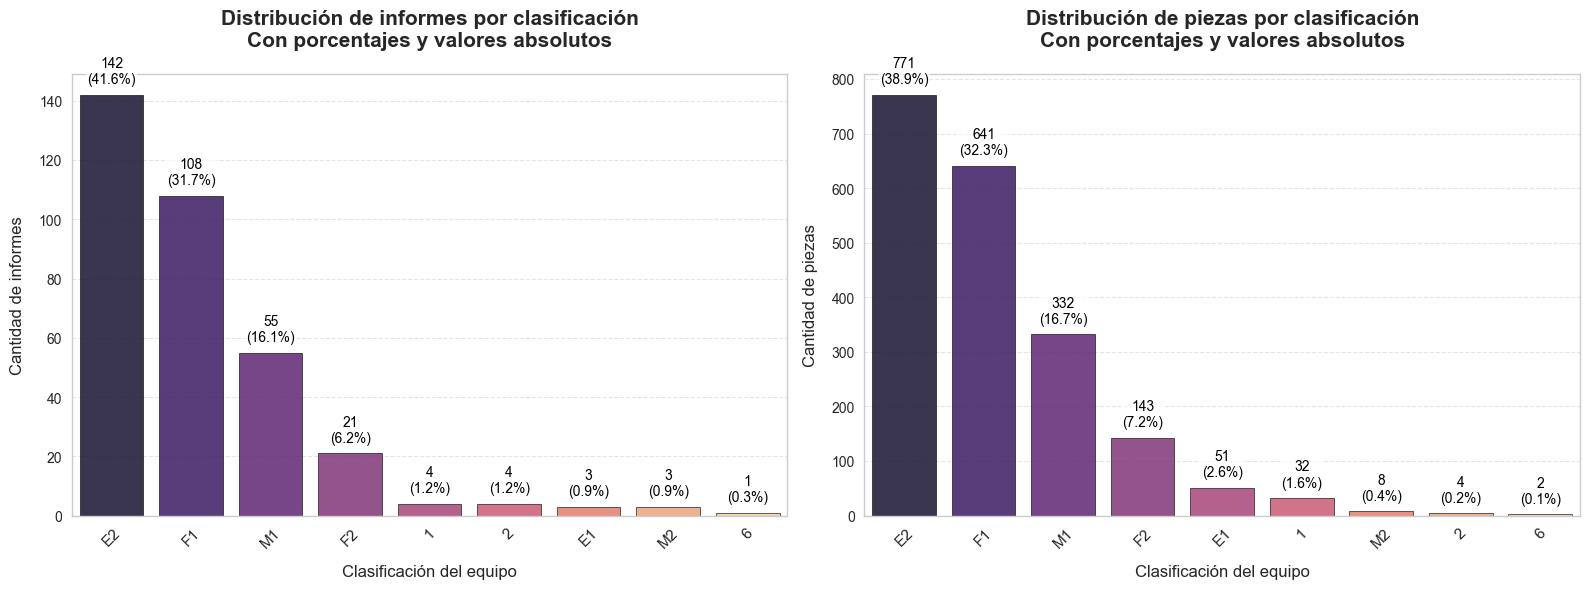

In [ ]:
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Primer gráfico: Cantidad de informes por clasificación ---
# Calculamos los porcentajes
total = qty_per_class['rep_qty'].sum()
qty_per_class['percentage'] = (qty_per_class['rep_qty'] / total) * 100

sns.barplot(
    x='classification',
    y='rep_qty',
    hue='classification',  # Added to address warning
    data=qty_per_class,
    palette='magma',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.85,
    dodge=False,  # Prevents side-by-side bars when using hue
    legend=False,
    ax=axes[0]  # Hides redundant legend
)

# Añadir etiquetas con valores absolutos y porcentajes
for i, bar in enumerate(axes[0].patches):
    height = bar.get_height()
    percentage = qty_per_class['percentage'].iloc[i]
    
    axes[0].text(
        x=bar.get_x() + bar.get_width() / 2,
        y=height + (0.02 * max(qty_per_class['rep_qty'])),  # Offset dinámico
        s=f"{height:.0f}\n({percentage:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=10,
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
    )

# Mejorar el título y etiquetas
axes[0].set_title("Distribución de informes por clasificación\nCon porcentajes y valores absolutos", 
                  fontsize=15, pad=20, fontweight='bold')
axes[0].set_xlabel("Clasificación del equipo", fontsize=12, labelpad=10)
axes[0].set_ylabel("Cantidad de informes", fontsize=12, labelpad=10)

# Rotación y formato de ejes
axes[0].tick_params(axis='x', rotation=45, labelsize=11)
axes[0].tick_params(axis='y', labelsize=10)

# Cuadrícula
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# --- Segundo gráfico: Cantidad de piezas por clasificación ---
# Calculamos los porcentajes
total = qty_per_class['qty_pieces'].sum()
qty_per_class['percentage'] = (qty_per_class['qty_pieces'] / total) * 100

# Ordenar el DataFrame por 'qty_pieces' de forma descendente
qty_per_class_ordenado = qty_per_class.sort_values(by='qty_pieces', ascending=False)

sns.barplot(
    x='classification',
    y='qty_pieces',
    hue='classification',  # Added to address warning
    data=qty_per_class_ordenado,  # Usar el DataFrame ordenado
    palette='magma',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.85,
    dodge=False,  # Prevents side-by-side bars when using hue
    legend=False,
    ax=axes[1]  # Hides redundant legend
)

# Añadir etiquetas con valores absolutos y porcentajes
for i, bar in enumerate(axes[1].patches):
    height = bar.get_height()
    percentage = qty_per_class_ordenado['percentage'].iloc[i]  # Usar el DataFrame ordenado

    axes[1].text(
        x=bar.get_x() + bar.get_width() / 2,
        y=height + (0.02 * max(qty_per_class_ordenado['qty_pieces'])),  # Offset dinámico
        s=f"{height:.0f}\n({percentage:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=10,
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
    )

# Mejorar el título y etiquetas
axes[1].set_title("Distribución de piezas por clasificación\nCon porcentajes y valores absolutos",
                    fontsize=15, pad=20, fontweight='bold')
axes[1].set_xlabel("Clasificación del equipo", fontsize=12, labelpad=10)
axes[1].set_ylabel("Cantidad de piezas", fontsize=12, labelpad=10)

# Rotación y formato de ejes
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=10)

# Cuadrícula
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar márgenes
plt.tight_layout()
plt.show()


### Distribución de Informes y Cantidad de Piezas por Clasificación  


### 🔍 Hallazgos Clave  
1. **Dominancia clara**:  
   - La clasificación **E2** concentra el **41.9% del total de informes** (339 informes) y el **38.9% de las piezas** (1984 piezas).  
   - Las categorías (E2, F1, M1 Y F2) representan **95.6%** del total de informes (339 informes) y el **95.1%** de las piezas (1984 piezas). 

2. **Cola larga**:  
   - 5 clasificaciones (1, 2, E1, M2 y 6) con ≤ 5.0% de participación en total de informes y de piezas.
   - La clasificación **E1** tiene un número significativo de piezas (2.6% del total), pero solo representa el **0.9% de los informes**, lo que sugiere que cada informe involucra un número elevado de piezas.

In [ ]:
qty_per_class['pieces_per_report'] = (qty_per_class['qty_pieces'] / qty_per_class['rep_qty']).round(2)
ratios = qty_per_class[['classification', 'pieces_per_report']].copy()
ratios.sort_values(by='pieces_per_report', ascending=False, inplace=True)
ratios

,classification,pieces_per_report
3,E1,17.00
0,1,8.00
6,F2,6.81
7,M1,6.04
5,F1,5.94
4,E2,5.43
8,M2,2.67
2,6,2.00
1,2,1.00


In [ ]:
# Paletas refinadas de colores
blues = ["#0d47a1", "#2196f3", "#64b5f6", "#90caf9", "#c6dafc"]
greens = ["#006600", "#119911", "#55dd55", "#88ee88", "#bbffbb"]

# Ordenar y asignar colores (de más alto a más bajo)
sorted_indices_p = np.argsort(-qty_per_class['qty_pieces'])
sorted_indices_r = np.argsort(-qty_per_class['rep_qty'])

colors_p = [blues[min(i, len(blues)-1)] for i in range(len(qty_per_class))]
colors_r = [greens[min(i, len(greens)-1)] for i in range(len(qty_per_class))]

# Reasignar colores al orden original
colores_piezas = [None] * len(qty_per_class)
colores_reportes = [None] * len(qty_per_class)
for i, idx in enumerate(sorted_indices_p): colores_piezas[idx] = colors_p[i]
for i, idx in enumerate(sorted_indices_r): colores_reportes[idx] = colors_r[i]


# Crea el subplot: 1 fila, 2 columnas
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[1, 0.3],
    specs=[[{"type": "bar"}, {"type": "table"}]],
    horizontal_spacing=0.1  # Espaciado entre tabla y gráfico
)

# Piezas
fig.add_trace(
    go.Bar(
        x=qty_per_class['classification'],
        y=qty_per_class['qty_pieces'],
        name='Piezas',
        marker_color=colores_piezas,
        text=qty_per_class['qty_pieces'],
        textposition='outside',
        hovertemplate='<b>%{x}</b><br>Piezas: %{y:,}<extra></extra>',
    ),
    row=1, col=1
)

# Reportes
fig.add_trace(
    go.Bar(
        x=qty_per_class['classification'],
        y=qty_per_class['rep_qty'],
        name='Reportes',
        marker_color=colores_reportes,
        text=qty_per_class['rep_qty'],
        textposition='outside',
        hovertemplate='<b>%{x}</b><br>Reportes: %{y:,}<extra></extra>',
    ),
    row=1, col=1
)



fig.add_trace(
    go.Table(
        header=dict(values=['Clasificación', 'Piezas por reporte'], fill_color='#5a4570', align='center',
            font=dict(color='white', size=14)),
        cells=dict(values=[ratios['classification'], ratios['pieces_per_report']],
            fill_color='#c6dafc',
            align='center',
            font=dict(color='black', size=12),
            format=[None, ",", ","]  # Formato con comas para valores numéricos
                   
                   ),
    ),
    row=1, col=2        
)

# Diseño limpio y agrupado
fig.update_layout(
    title=dict(
        text="<b>Piezas vs Reportes por Clasificación</b>",
        x=0.5,
        font=dict(size=20)
    ),
    font=dict(family="Arial", size=13),
    barmode="group",  # <-- Agrupadas, no apiladas
    bargap=0.2,
    bargroupgap=0,
    template="plotly_white",
    height=650,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.3,  # Centrado sobre el gráfico izquierdo
        bgcolor='rgba(255,255,255,0.8)',
    ),
    margin=dict(t=80, b=50, l=60, r=40)
)

# Actualizar títulos de ejes para el gráfico de barras
fig.update_xaxes(title_text="Clasificación", row=1, col=1)
fig.update_yaxes(title_text="Cantidad", row=1, col=1)

# Mostrar el gráfico
fig.show()

## Análisis de los tiempos de entrega por clasificación de equipo

In [ ]:
class_del_time = qty_per_class[['classification','rep_qty', 'qty_pieces', 'deliv_time_avg']].sort_values(by='deliv_time_avg', ascending=False).reset_index(drop=True)
class_del_time['pieces_per_report'] = class_del_time['qty_pieces'] / class_del_time['rep_qty']
class_del_time['pieces_per_report'] = class_del_time['pieces_per_report'].round(2)
class_del_time

,classification,rep_qty,qty_pieces,deliv_time_avg,pieces_per_report
0,E1,3,51.0,37.33,17.00
1,2,4,4.0,14.00,1.00
2,1,4,32.0,12.50,8.00
3,E2,142,771.0,11.63,5.43
4,M2,3,8.0,9.67,2.67
5,F2,21,143.0,9.05,6.81
6,F1,108,641.0,8.80,5.94
7,M1,55,332.0,8.47,6.04
8,6,1,2.0,5.00,2.00


class_del_time = mass_sin_errores.groupby(['classification'])['delivery_time'].mean().round(2).reset_index()
class_del_time

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Ordenar el dataframe por tiempo de entrega (descendente)
class_del_time_sorted = class_del_time.sort_values('deliv_time_avg', ascending=False)

# Crear el gráfico base con plotly express
fig = px.bar(
    class_del_time_sorted,
    y='classification',
    x='deliv_time_avg',
    text=[f'{x:.1f}' for x in class_del_time_sorted.deliv_time_avg],
    hover_data={
        'rep_qty': True,
        'qty_pieces': True,
        'pieces_per_report': ':.1f',
        'deliv_time_avg': False,
        'classification': False
    },
    labels={
        'deliv_time_avg': 'Tiempo de entrega (días)', 
        'classification': '',
        'rep_qty': 'Reportes',
        'qty_pieces': 'Piezas',
        'pieces_per_report': 'Piezas/reporte'
    },
    color='deliv_time_avg',  # Color basado en el valor del tiempo
    color_continuous_scale='RdBu',  # Usar escala verde-azul predefinida
    orientation='h',
    height=600
)

# Calcular el valor promedio
promedio_general = class_del_time.deliv_time_avg.mean()

# Personalización del estilo
fig.update_traces(
    textposition='outside',
    textfont=dict(size=12, color='#333333'),
    marker_line_color='#2d5f4d',
    marker_line_width=1,
    hovertemplate="<b>%{y}</b><br>Tiempo: %{x:.1f} días<br>Reportes: %{customdata[0]}<br>Piezas: %{customdata[1]}<br>Piezas/reporte: %{customdata[2]}"
)

# Añadir línea para el promedio general
fig.add_shape(
    type="line",
    x0=promedio_general,
    y0=-0.5,
    x1=promedio_general,
    y1=len(class_del_time) - 0.5,
    line=dict(
        color="#ff6347",
        width=2,
        dash="dash",
    )
)

# Añadir texto para el promedio
fig.add_annotation(
    x=promedio_general,
    y=len(class_del_time_sorted) - 0.5,
    text=f"Promedio: {promedio_general:.1f}",
    showarrow=False,
    font=dict(color="#ff6347", size=12),
    yshift=20
)

# Configurar el layout
fig.update_layout(
    title={
        'text': 'Tiempo promedio de entrega por clasificación',
        'font': {'size': 18, 'family': 'Arial', 'color': '#333333'},
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center'
    },
    xaxis_title='Días',
    plot_bgcolor='white',
    margin=dict(l=140, r=120, t=100, b=50),
    font=dict(family='Arial', size=12),
    coloraxis_colorbar=dict(
        title='Días',
        thickness=15,
        len=0.6,
        tickformat='.1f'
    ),
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        font_family='Arial'
    )
)

'''# Añadir etiqueta "días" al final de cada barra
for i, value in enumerate(class_del_time_sorted.deliv_time_avg):
    fig.add_annotation(
        x=value,
        y=class_del_time_sorted.classification.iloc[i],
        #text="días",
        showarrow=False,
        xshift=30,
        font=dict(size=12, color="#555555")
    )'''

fig.show()

# Análisis de Casos Atípicos y Recomendaciones

## 🔴 Casos Atípicos Identificados

### 1. Demora Extrema en Calibración (37.33 días)
- **Descripción**:  
  Tiempo de calibración 7.5 veces mayor que el valor más bajo (5 días)
- **Impacto**:  
  Puede retrasar toda la cadena de procesos del laboratorio

## 🛠 Recomendaciones Específicas

### Para Demora de 37.33 Días
1. **Acción Inmediata**:  
    - Revisar el caso específico para entender la causa de la demora.
    - Considerar la posibilidad de un mapeo del proceso que permita identificar los cuellos de botella.
    - Analizar si el tiempo de entrega se vio afectado por la cantidad de piezas enviadas o por la complejidad del equipo.
2. **Revisión del proceso**:
    - Evaluar si el tiempo de entrega asignado es adecuado para este tipo de calibración.
    - Considerar la posibilidad de ajustar los tiempos asignados para evitar demoras excesivas en el futuro.
3. **Documentación**:
    - Registrar el caso y las acciones tomadas para futuras referencias.
    - Utilizar esta información para mejorar los procesos y evitar demoras similares en el futuro.
4. **Análisis de datos**:
    - Realizar un análisis de datos para identificar patrones o tendencias en los tiempos de entrega.
    - Utilizar esta información para mejorar la planificación y la gestión de recursos en el laboratorio.

### --------------------------------------------------------------------------------------------------

## Análisis de los tiempos de entrega vs los tiempos asignados

In [ ]:
tiempo = loc_lab.groupby(['classification']).agg(
    rep_qty=('report_number', 'count'),
    qty_pieces=('piece_count', 'sum'),
    deliv_time_avg=('delivery_time', 'mean'),
    assigned_time_avg=('assigned_time', 'mean'),
    pieces_per_report=('piece_count', lambda x: x.sum() / len(x)),
).reset_index()
tiempo = tiempo.sort_values('rep_qty', ascending=False).round(2)
tiempo

,classification,rep_qty,qty_pieces,deliv_time_avg,assigned_time_avg,pieces_per_report
4,E2,142,771.0,11.63,15.58,5.43
5,F1,108,641.0,8.80,12.60,5.94
7,M1,55,332.0,8.47,12.40,6.04
6,F2,21,143.0,9.05,12.90,6.81
0,1,4,32.0,12.50,15.50,8.00
1,2,4,4.0,14.00,18.00,1.00
3,E1,3,51.0,37.33,30.00,17.00
8,M2,3,8.0,9.67,14.00,2.67
2,6,1,2.0,5.00,12.00,2.00


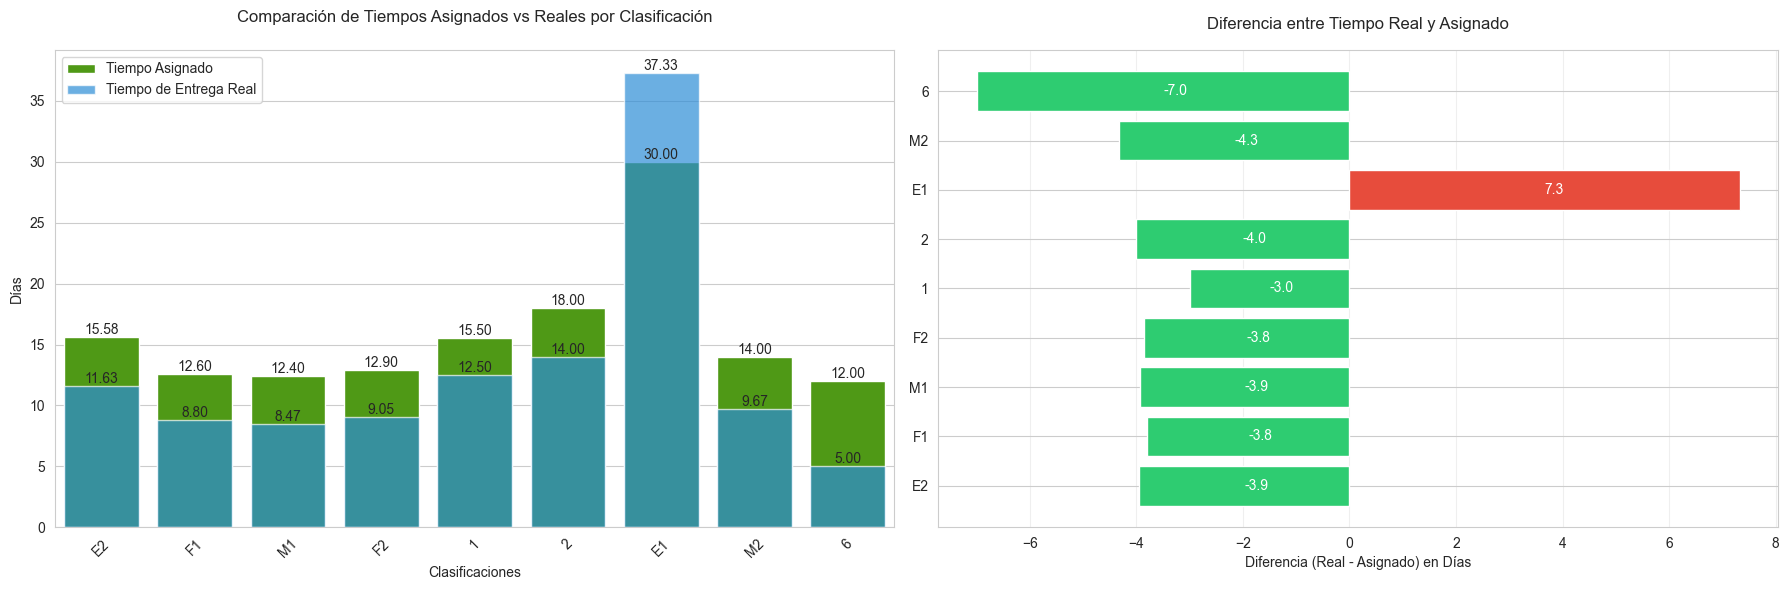

In [ ]:
equipos = tiempo['classification'].tolist()
asignado = tiempo['assigned_time_avg'].tolist()
real = tiempo['deliv_time_avg'].tolist()
diferencias = [r - a for r, a in zip(real, asignado)]

# Configurar la figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Primer Gráfico: Comparación de Tiempos Asignados vs Reales ---
ax1 = axes[0]
sns.barplot(x=equipos, y=asignado, color='#4CAF00', label='Tiempo Asignado', ax=ax1)
sns.barplot(x=equipos, y=real, color='#1191F3', label='Tiempo de Entrega Real', alpha=0.7, ax=ax1)

# Personalización del primer gráfico
ax1.set_title('Comparación de Tiempos Asignados vs Reales por Clasificación', pad=20)
ax1.set_xlabel('Clasificaciones')
ax1.set_ylabel('Días')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# Añadir valores al primer gráfico
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

# --- Segundo Gráfico: Diferencia entre Tiempo Real y Asignado ---
ax2 = axes[1]
bars = ax2.barh(equipos, diferencias, color=np.where(np.array(diferencias) > 0, '#e74c3c', '#2ecc71'))

# Personalización del segundo gráfico
ax2.set_title('Diferencia entre Tiempo Real y Asignado', pad=15)
ax2.set_xlabel('Diferencia (Real - Asignado) en Días')
ax2.grid(axis='x', alpha=0.3)

# Añadir valores al segundo gráfico
for bar in bars:
    width = bar.get_width()
    ax2.text(width/2, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}',
             va='center',
             color='white' if abs(width) > 1 else 'black')

plt.tight_layout()
plt.show()

## Análisis General

**1.📊 Sobrestimación General:**  
En la mayoría de las clasificaciones, el tiempo asignado parece ser una sobreestimación del tiempo de entrega real. Esto podría indicar:
- Procesos operativos eficientes.
- Planificación conservadora en la asignación.
- Ajustar los tiempos asignados para reflejar mejor la realidad operativa.
- Oportunidad de optimización en la asignación de tiempos.

**2.⚠️ Problema Crítico en la Clasificación "2":**  
La clasificación "2" presenta una desviación alarmante:
- Tiempo real **excede significativamente** el asignado.
- Requiere investigación inmediata para identificar:
  - Cuellos de botella operativos.
  - Errores en la estimación inicial.

**3.📊 Variabilidad en la Precisión de la Estimación:**  
- Magnitud de diferencias (real vs. asignado) varía entre clasificaciones.
- Sugiere inconsistencias en los métodos de estimación.

**4.🔍 Potencial de Optimización:**  
- Tiempo real menor al asignado en la mayoría de casos señala oportunidades para:
  - Ajustar estándares de planificación.
  - Reducir márgenes de seguridad excesivos.
  - Verificar el impacto de la cantidad de piezas en el tiempo de entrega.
  - Considerar la posibilidad de ajustar los tiempos asignados para evitar sobrecargas en el proceso de calibración.

---

##💡 Puntos Clave para la Acción

1. **Prioridad Urgente: Clasificación "2"**  
   - Realizar análisis de causa raíz (ej: diagrama de Ishikawa o de espina de pescado).
   - Evaluar recursos asignados vs. requerimientos reales.

2. **Analizar Diferencias Negativas Destacadas**  
   - Identificar prácticas eficientes en clasificaciones con:
   - Diferencias negativas mayores a 2 días.
   - Replicar buenas prácticas en otras áreas.

3. **Revisión del Proceso de Estimación**  
   - Revisar las metodologías actuales de asignación de tiempos.
   - Implementar sistema de feedback continuo entre equipos operativos y de planificación.

---

**Conclusión**  
El gráfico revela:  
⚠️ **Falla crítica en Clasificación "2"** (tiempo de entrega excesivo)  
✅ **Sobrestimación sistemática** en otras clasificaciones (oportunidad de optimización).  

*Acciones recomendadas:*  
- Corrección inmediata para Clasificación "2".  
- Estandarización de procesos de estimación con datos históricos.  

# -------------------------------------------------------------------

In [ ]:
loc_lab

,report_number,so,assignee,calibrator,supervisor,approver,classification,lab_received_date,scheduled_delivery_date,cleaning_date,...,assigned_time,priority,piece_count,year_received,month_received,week_received,year_delivery,month_delivery,week_delivery,equipment_type
0,CCM0001.M/2025,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,20.0,ORDINARIO,1.0,2024,12,49,2025,1,2,Pesa
1,CCM0002.M/2025,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,20.0,ORDINARIO,1.0,2024,12,49,2025,1,2,Pesa
2,CCM0003.M/2025,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,20.0,ORDINARIO,1.0,2024,12,49,2025,1,2,Pesa
3,CCM0004.M/2025,H2381,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2024-12-05,2025-01-06,2024-12-06,...,20.0,ORDINARIO,1.0,2024,12,49,2025,1,2,Pesa
4,CCM0005.M/2025 v0,I0082,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,Gabriel Gallardo Camacho,Gabriel Gallardo Camacho,E2,2025-01-21,2025-01-31,2025-01-21,...,8.0,ORDINARIO,1.0,2025,1,4,2025,1,5,Pesa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,CCM1842.M/2024,H2416,Mario de Jesús García,Mario de Jesús García,Leobardo Maximiliano Brito Fonseca,Leobardo Maximiliano Brito Fonseca,M1,2024-12-10,2025-01-07,2024-12-17,...,18.0,ORDINARIO,2.0,2024,12,50,2025,1,2,Pesa
384,CCM1862.M/2024,H2428,Sergio Cruz Santiago,Sergio Cruz Santiago,Francisco Torres Cabrera,Francisco Torres Cabrera,2,2024-12-11,2025-01-08,2024-12-12,...,18.0,ORDINARIO,1.0,2024,12,50,2025,1,1,Pesa
385,CCM1863.M/2024,H2428,Sergio Cruz Santiago,Sergio Cruz Santiago,Francisco Torres Cabrera,Francisco Torres Cabrera,2,2024-12-11,2025-01-08,2024-12-12,...,18.0,ORDINARIO,1.0,2024,12,50,2025,1,1,Pesa
386,CCM1864.M/2024,H2428,Sergio Cruz Santiago,Sergio Cruz Santiago,Francisco Torres Cabrera,Francisco Torres Cabrera,2,2024-12-11,2025-01-08,2024-12-12,...,18.0,ORDINARIO,1.0,2024,12,50,2025,1,1,Pesa


In [ ]:
loc_lab.columns

Index(['report_number', 'so', 'assignee', 'calibrator', 'supervisor',
       'approver', 'classification', 'lab_received_date',
       'scheduled_delivery_date', 'cleaning_date', 'calibration_date',
       'delivery_date', 'delivery_time', 'assigned_time', 'priority',
       'piece_count', 'year_received', 'month_received', 'week_received',
       'year_delivery', 'month_delivery', 'week_delivery', 'equipment_type'],
      dtype='object')

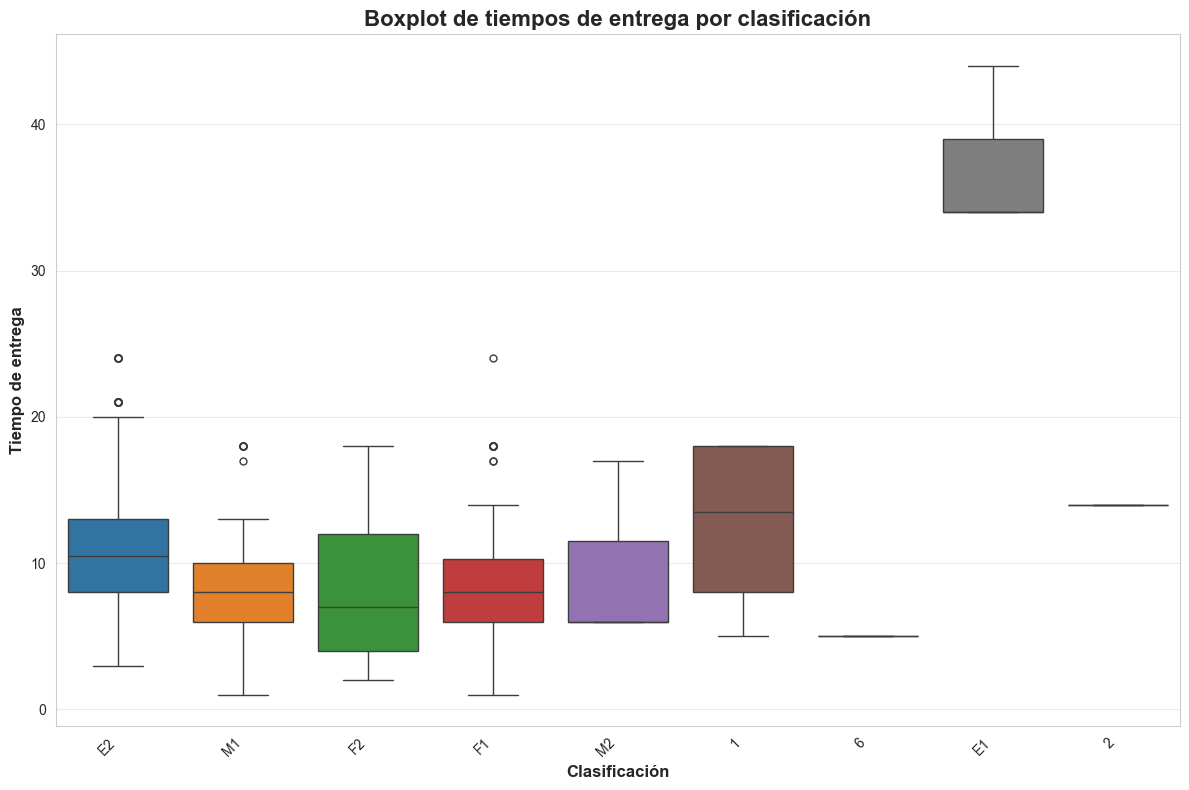

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
boxplot = sns.boxplot(x='classification', y='delivery_time', hue='classification', 
                      data=loc_lab, width=0.8, fliersize=5, whis=1.5, ax=ax)

# Añadir etiquetas a los outliers
for i, artist in enumerate(boxplot.artists):
    # Obtener la clasificación actual
    classification = loc_lab['classification'].unique()[i]
    
    # Obtener los datos para esta clasificación
    category_data = loc_lab[loc_lab['classification'] == classification]['delivery_time']
    
    # Calcular Q1, Q3 e IQR
    Q1 = np.percentile(category_data, 25)
    Q3 = np.percentile(category_data, 75)
    IQR = Q3 - Q1
    
    # Identificar outliers
    outliers = category_data[(category_data < Q1 - 1.5 * IQR) | (category_data > Q3 + 1.5 * IQR)]
    
    # Para cada outlier, añadir una etiqueta
    for outlier_value in outliers:
        # Obtener el índice/fila del outlier
        outlier_index = loc_lab[(loc_lab['classification'] == classification) & 
                               (loc_lab['delivery_time'] == outlier_value)].index
        
        # Para cada índice encontrado (podría haber múltiples filas con el mismo valor)
        for idx in outlier_index:
            # Obtener la posición x (basada en la posición de la categoría)
            x_pos = i
            
            # Añadir etiqueta de texto
            ax.text(x_pos, outlier_value, f'{idx}', 
                    ha='center', va='bottom', fontsize=9, 
                    color='red', fontweight='bold')

# Personalizar el gráfico
plt.title('Boxplot de tiempos de entrega por clasificación', fontsize=16, fontweight='bold')
plt.xlabel('Clasificación', fontsize=12, fontweight='bold')
plt.ylabel('Tiempo de entrega', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()  # Ajustar diseño para evitar recortes
plt.show()

# Análisis: Boxplot de Tiempos de Entrega por Clasificación

## Hallazgos principales

- **E1**: Tiempos de entrega significativamente superiores (33-39 días), con distribución compacta que indica consistencia.

- **Clasificaciones estándar** (E2, F1, F2, M1, M2, 1): Presentan medianas entre 7-13 días, formando un grupo homogéneo con variaciones moderadas.

- **Outliers**: Detectados principalmente en E2, F1 y M1, con tiempos de entrega atípicos que llegan hasta ~24 días.

- **Casos especiales**: 
  - Clasificación "6": Valor único o muy poca variación (~5 días)
  - Clasificación "2": Distribución extremadamente compacta (~13 días)

## Variabilidad por clasificación

| Clasificación | Variabilidad | Mediana aproximada | Outliers |
|---------------|--------------|-------------------|----------|
| E1 | Baja | 35 días | No |
| 1 | Alta | 13 días | No |
| E2 | Media | 10 días | Sí (2) |
| F1 | Media | 8 días | Sí (3) |
| F2 | Alta | 7 días | No |
| M1 | Media | 8 días | Sí (2) |
| M2 | Media | 9 días | No |
| 6 | Muy baja | 5 días | No |
| 2 | Muy baja | 13 días | No |

## Implicaciones

1. **Segmentación clara**: E1 constituye un grupo completamente separado, que requeriría expectativas de entrega diferentes.

2. **Predictibilidad**: Las clasificaciones con baja variabilidad (E1, 6, 2) permiten estimaciones más precisas de tiempos de entrega.

3. **Investigación necesaria**: Los outliers identificados en varias clasificaciones sugieren incidentes específicos que merecen análisis para determinar causas de retrasos.

# ---------------------------------------------------------------------------

## Se comparan los tiempos de entrega promedios por clasificación de equipo para ver si existe alguna relación con la cantidad de piezas promedio por por cada clase.


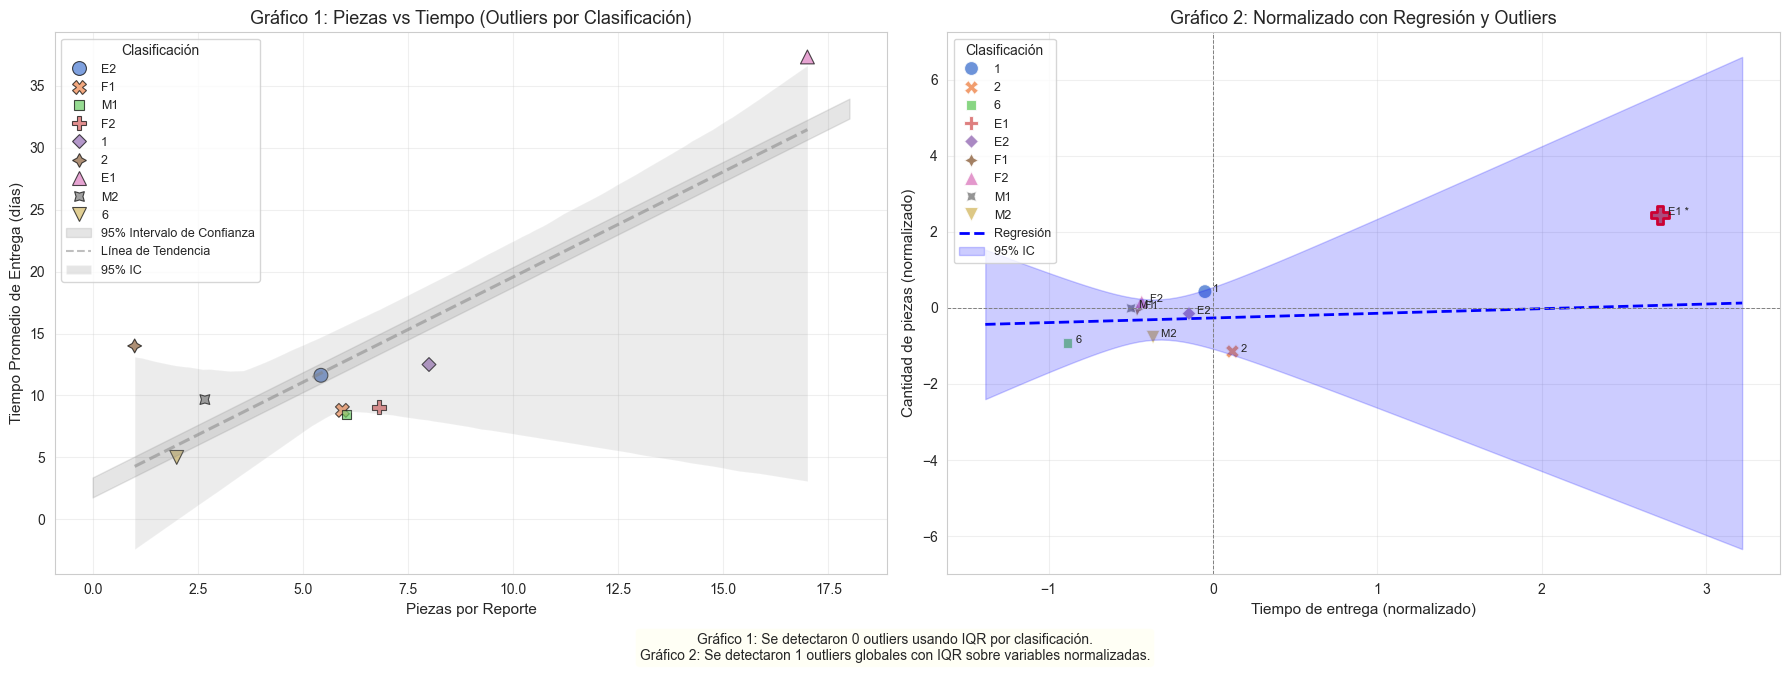

In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Preparar los datos (asumiendo que 'tiempo' es el DataFrame original)
df1 = tiempo.reset_index()
df2 = tiempo[['classification', 'deliv_time_avg', 'pieces_per_report']].copy()
df2.rename(columns={'classification': 'Clasificación',
                    'deliv_time_avg': 'Tiempo_entrega',
                    'pieces_per_report': 'Cantidad_piezas'}, inplace=True)
df2['Clasificación'] = df2['Clasificación'].astype('category')

# === FIGURA Y ESTILO GENERAL ===
sns.set_style("whitegrid")
sns.set_palette("muted")
fig, axs = plt.subplots(1, 2, figsize=(18, 7))
plt.subplots_adjust(wspace=0.3)

# === GRÁFICO 1: Sin normalizar, detección IQR por grupo ===
def detect_outliers(df, variables):
    outlier_indices = []
    for var in variables:
        for classification, group in df.groupby('classification'):
            Q1 = group[var].quantile(0.25)
            Q3 = group[var].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = group[(group[var] < lower) | (group[var] > upper)]
            outlier_indices.extend(outliers.index.difference(outlier_indices))
    return outlier_indices

outlier_indices = detect_outliers(df1, ['pieces_per_report', 'deliv_time_avg'])
df1['is_outlier'] = df1.index.isin(outlier_indices)

# Scatterplot sin outliers
sns.scatterplot(
    data=df1[~df1['is_outlier']],
    x='pieces_per_report',
    y='deliv_time_avg',
    hue='classification',
    style='classification',
    s=100, alpha=0.7, edgecolor='black',
    ax=axs[0]
)

# Outliers resaltados
sns.scatterplot(
    data=df1[df1['is_outlier']],
    x='pieces_per_report',
    y='deliv_time_avg',
    hue='classification',
    style='classification',
    s=150, alpha=1.0, edgecolor='red', linewidth=2,
    legend=False, ax=axs[0]
)

# Línea de regresión (sin outliers)
sns.regplot(
    data=df1[~df1['is_outlier']],
    x='pieces_per_report',
    y='deliv_time_avg',
    scatter=False,
    color='gray', line_kws={'linestyle':'--', 'alpha':0.5},
    ax=axs[0]
)

# Intervalo de confianza
x = df1.loc[~df1['is_outlier'], 'pieces_per_report'].values
y = df1.loc[~df1['is_outlier'], 'deliv_time_avg'].values
slope, intercept, _, _, std_err = stats.linregress(x, y)
x_pred = np.linspace(df1['pieces_per_report'].min() - 1, df1['pieces_per_report'].max() + 1, 100)
y_pred = intercept + slope * x_pred
axs[0].fill_between(
    x_pred,
    y_pred - 1.96 * std_err,
    y_pred + 1.96 * std_err,
    alpha=0.2, color='gray', label='95% Intervalo de Confianza'
)

# Anotaciones de outliers
for idx in outlier_indices:
    row = df1.loc[idx]
    axs[0].annotate(
        f"{row['classification']} (Outlier)",
        xy=(row['pieces_per_report'], row['deliv_time_avg']),
        xytext=(10, 10),
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
        fontsize=8, color='darkred', weight='bold'
    )

axs[0].set_title("Gráfico 1: Piezas vs Tiempo (Outliers por Clasificación)", fontsize=13)
axs[0].set_xlabel("Piezas por Reporte", fontsize=11)
axs[0].set_ylabel("Tiempo Promedio de Entrega (días)", fontsize=11)
axs[0].grid(True, alpha=0.3)

# Leyenda personalizada
handles, labels = axs[0].get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='gray', linestyle='--', alpha=0.5))
handles.append(plt.Rectangle((0,0), 1, 1, fc='gray', alpha=0.2))
labels.append('Línea de Tendencia')
labels.append('95% IC')
axs[0].legend(handles=handles, labels=labels, title='Clasificación', fontsize=9, title_fontsize=10)

# === GRÁFICO 2: Normalizado ===
scaler = StandardScaler()
df2[['Tiempo_norm', 'Cantidad_norm']] = scaler.fit_transform(df2[['Tiempo_entrega', 'Cantidad_piezas']])

# Detección IQR global
Q1_t, Q3_t = df2['Tiempo_norm'].quantile([0.25, 0.75])
IQR_t = Q3_t - Q1_t
Q1_p, Q3_p = df2['Cantidad_norm'].quantile([0.25, 0.75])
IQR_p = Q3_p - Q1_p
df2['es_outlier'] = ((df2['Tiempo_norm'] < Q1_t - 1.5 * IQR_t) | (df2['Tiempo_norm'] > Q3_t + 1.5 * IQR_t) |
                     (df2['Cantidad_norm'] < Q1_p - 1.5 * IQR_p) | (df2['Cantidad_norm'] > Q3_p + 1.5 * IQR_p))

# Scatterplot
sns.scatterplot(
    data=df2[~df2['es_outlier']], 
    x='Tiempo_norm', 
    y='Cantidad_norm', 
    hue='Clasificación', 
    style='Clasificación', 
    s=100, alpha=0.8, ax=axs[1]
)
sns.scatterplot(
    data=df2[df2['es_outlier']], 
    x='Tiempo_norm', 
    y='Cantidad_norm', 
    hue='Clasificación',
    style='Clasificación',
    s=150,
    edgecolor='red',
    linewidth=2,
    marker='X',
    legend=False,
    ax=axs[1]
)

# Regresión lineal
df_no_outliers = df2[~df2['es_outlier']]
X = df_no_outliers[['Tiempo_norm']].values.reshape(-1, 1)
y = df_no_outliers['Cantidad_norm'].values
modelo = LinearRegression().fit(X, y)

x_range = np.linspace(df2['Tiempo_norm'].min() - 0.5, df2['Tiempo_norm'].max() + 0.5, 100)
y_pred = modelo.predict(x_range.reshape(-1, 1))
axs[1].plot(x_range, y_pred, color='blue', linestyle='--', linewidth=2, label='Regresión')

# Intervalo de confianza
X_orig = df_no_outliers['Tiempo_norm'].values
y_orig = df_no_outliers['Cantidad_norm'].values
n = len(X_orig)
mean_x = np.mean(X_orig)
residuos = y_orig - modelo.predict(X_orig.reshape(-1, 1))
std_error = np.sqrt(np.sum(residuos**2) / (n - 2))
t_critical = stats.t.ppf(0.975, n - 2)

ci_lower, ci_upper = [], []
for x_val in x_range:
    se_y_pred = std_error * np.sqrt(1/n + (x_val - mean_x)**2 / np.sum((X_orig - mean_x)**2))
    ci_lower.append(modelo.predict([[x_val]])[0] - t_critical * se_y_pred)
    ci_upper.append(modelo.predict([[x_val]])[0] + t_critical * se_y_pred)

axs[1].fill_between(x_range, ci_lower, ci_upper, color='blue', alpha=0.2, label='95% IC')

# Anotaciones
for _, row in df2.iterrows():
    marker = '*' if row['es_outlier'] else ''
    axs[1].text(row['Tiempo_norm'] + 0.05, row['Cantidad_norm'], 
                f"{row['Clasificación']} {marker}", fontsize=8)

axs[1].axhline(0, color='grey', linestyle='--', linewidth=0.7)
axs[1].axvline(0, color='grey', linestyle='--', linewidth=0.7)
axs[1].set_title("Gráfico 2: Normalizado con Regresión y Outliers", fontsize=13)
axs[1].set_xlabel("Tiempo de entrega (normalizado)", fontsize=11)
axs[1].set_ylabel("Cantidad de piezas (normalizado)", fontsize=11)
axs[1].legend(title='Clasificación', fontsize=9, title_fontsize=10)
axs[1].grid(True, alpha=0.3)

# Texto explicativo final
fig.text(0.5, 0.01, 
         f"Gráfico 1: Se detectaron {len(outlier_indices)} outliers usando IQR por clasificación.\n"
         f"Gráfico 2: Se detectaron {df2['es_outlier'].sum()} outliers globales con IQR sobre variables normalizadas.",
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.3))

plt.tight_layout(rect=[0, 0.05, 1, 0.96])
plt.show()


# Análisis de la Relación entre Cantidad de Piezas y Tiempo de Entrega

## Resumen 

Se analiza la relación entre la cantidad de piezas y el tiempo de entrega a partir de dos visualizaciones complementarias: un gráfico normalizado y otro con valores originales. Los datos revelan una correlación positiva débil entre ambas variables, con las clasificaciones mostrando comportamientos diferenciados.

## Análisis de Visualizaciones

### Gráfico No Normalizado (Imagen 1)
- **Correlación:** Confirma la relación positiva entre piezas por reporte y tiempo de entrega
- **Rango:** Tiempos de entrega entre 5 y 37 días aproximadamente
- **Outliers:** No se detectaron valores atípicos según el método IQR aplicado
- **Dispersión:** Mayor concentración de datos en la zona central del gráfico

### Gráfico Normalizado (Imagen 2)
- **Correlación:** Muestra una tendencia positiva débil con pendiente de 0.11
- **Outliers:** Se identificó un valor atípico (punto E1) mediante el método IQR
- **Comportamiento:** El intervalo de confianza se ensancha significativamente en los extremos, indicando mayor incertidumbre predictiva
- **Metodología:** La línea de regresión y el intervalo de confianza se calcularon excluyendo outliers



## Hallazgos Principales

1. **Correlación positiva:** A mayor cantidad de piezas, mayor tiempo de entrega, aunque esta relación no es fuerte.

2. **Comportamiento por categorías:** Las diferentes clasificaciones (1, 2, 6, E1, E2, F1, F2, M1, M2) muestran patrones distintos:
   - El punto E1 presenta el tiempo de entrega más elevado
   - Categorías como M1, F1 y F2 tienden a agruparse
   - Las clasificaciones (1, 2, 6) presentan mayor variabilidad

3. **Variabilidad predictiva:** La amplitud del intervalo de confianza sugiere que:
   - Los pronósticos son más precisos para valores centrales
   - Existe alta incertidumbre en predicciones para cantidades extremas de piezas

4. **Efecto de la normalización:** La transformación de los datos facilita la identificación de valores atípicos que no serían evidentes en la escala original.

## Conclusiones

- Existe una relación positiva pero moderada entre la cantidad de piezas y el tiempo de entrega
- La categorización de los productos influye significativamente en los tiempos de entrega
- La normalización de datos mejora la detección de valores atípicos y patrones no evidentes
- Se recomienda considerar factores adicionales más allá de la cantidad de piezas para mejorar la precisión en la estimación de tiempos de entrega

## Recomendaciones

1. Investigar las causas del comportamiento atípico de la categoría E1
2. Desarrollar modelos predictivos específicos por categoría de producto
3. Incorporar variables adicionales para mejorar la precisión de las estimaciones
4. Realizar seguimiento continuo para identificar tendencias o cambios en los patrones detectados

# -----------------------------------------------------------------------------

## Análisis de tendencias

In [ ]:
tiempo_gral = mass_sin_errores.loc[mass_sin_errores['service_location'] == 'LAB'][['report_number','classification', 'lab_received_date','assigned_time', 'delivery_date ','delivery_time', ]].copy()

KeyError: "['delivery_date '] not in index"

In [ ]:
# Agregar efectividad a la tabla
tiempo_gral['efectividad'] = (tiempo_gral['delivery_time']/tiempo_gral['assigned_time']).round(2)
tiempo_gral
salva = tiempo_gral.copy()

In [ ]:
# Renombrar columnas para evitar problemas 
tiempo_gral.rename(columns={'delivery_date ': 'delivery_date'}, inplace=True)


In [ ]:
# Convertir a datetime y crear columnas de periodo
#tiempo_gral['delivery_date'] = pd.to_datetime(tiempo_gral['delivery_date'])
tiempo_gral['semana'] = tiempo_gral['delivery_date'].dt.to_period('W-SUN')  # Semana que comienza en lunes
tiempo_gral['mes'] = tiempo_gral['delivery_date'].dt.to_period('M')

### Análisis de la tendencia de los tiempos por semana

In [ ]:
time_per_week = tiempo_gral.groupby(['semana'])['delivery_time'].mean().round(2).reset_index()
time_per_week['semana'] = time_per_week['semana'].dt.start_time
time_per_week['semana'] = time_per_week['semana'].dt.strftime('%d-%b')
time_per_week.rename(columns={'delivery_time': 'Tiempo Promedio'}, inplace=True)
time_per_week

In [ ]:
df = time_per_week.copy()

# Configuración de estilo profesional
sns.set_theme(style="whitegrid", context="talk")  # Estilo más moderno y tamaño de fuentes adecuado
plt.figure(figsize=(14, 7))  # Tamaño más grande para mejor visualización

# Paleta de colores personalizada
colors = sns.color_palette("husl", 2)

# Gráfico de línea principal
ax = sns.lineplot(
    data=df,
    x='semana',
    y='Tiempo Promedio',
    marker='o',
    markersize=10,
    linewidth=2.5,
    color=colors[0],
    markerfacecolor='white',
    markeredgewidth=2,
    label='Tiempo semanal'
)

# Personalización avanzada del gráfico
ax.set_title('Evolución Semanal del Tiempo Promedio de Entrega\nPrimer Trimestre 2024', 
             fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Semana', fontsize=14, labelpad=15)
ax.set_ylabel('Días Promedio', fontsize=14, labelpad=15)

# Formateo de ejes
plt.xticks(rotation=50, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Línea de promedio general
mean_val = df['Tiempo Promedio'].mean()
plt.axhline(
    y=mean_val, 
    color=colors[1], 
    linestyle='--', 
    linewidth=2,
    alpha=0.8,
    label=f'Promedio general ({mean_val:.1f} días)'
)

# Etiquetas de datos mejoradas
for i, row in df.dropna().iterrows():
    ax.text(
        i, 
        row['Tiempo Promedio'] + 0.3,  # Ajuste de posición vertical
        f'{row["Tiempo Promedio"]:.1f}d', 
        ha='center', 
        va='bottom',
        fontsize=11,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
    )

# Elementos adicionales
sns.despine(left=True)  # Eliminar bordes para un look más limpio
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0.1)

# Leyenda mejorada
plt.legend(
    loc='upper right', 
    frameon=True, 
    framealpha=0.9,
    fontsize=12
)

# Ajuste final de layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

# 📈 Análisis de Datos (Unidades Asumidas en Días)

## 📌 Métricas Clave
| **Indicador**       | **Valor**          | **Detalle**                         |
|----------------------|--------------------|--------------------------------------|
| Máximo Histórico     | 19.9 días          | Semana del 6 de enero                          |
| Mínimo Histórico     | 6.3 días           | Semana del 17 de febrero                            |
| Promedio Trimestral  | 10.2 días          |        |
| Casos >14 días       | 3 semanas          | Semanas 1, 2, 14 y 15               |
| Variabilidad         | 13.6 días          | Diferencia entre máximo y mínimo    |

---

## 🚨 Alertas Operativas
1. **Incremento Extremo**:  
   - Semana 1 (19.9d) supera en **216%** el mínimo histórico (6.3d)  
   - *Impacto*: Retraso equivalente a 3.3 semanas laborales estándar  

2. **Tendencia Ascendente Final**:  
   - Últimas 2 semanas: **14.6d** (36% sobre el promedio)  
   - *Patrón*: Aumento del 22% respecto a la semana 13 (12.0d)  

3. **Inconsistencia Temporal**:  
   - 15 semanas registradas (trimestre estándar: 13 semanas)  

---

## 🔄 Distribución Temporal
```python
semanas = [19.9, 16.6, 9.2, 8.9, 6.8, 7.5, 6.3, 7.1, 8.8, 7.1, 9.6, 11.7, 12.0, 14.6, 14.6]
distribucion = {
    '<7d': sum(1 for d in semanas if d < 7),      # 1 semana
    '7-10d': sum(1 for d in semanas if 7 <= d <=10),  # 7 semanas
    '10-14d': sum(1 for d in semanas if 10 < d <=14), # 4 semanas
    '>14d': sum(1 for d in semanas if d >14)          # 3 semanas
}

# 📈 Análisis de Datos 

## 📌 Métricas Clave
| **Indicador**       | **Valor**          | **Detalle**                         |
|----------------------|--------------------|--------------------------------------|
| Máximo Histórico     | 19.9 días          | Semana 2                            |
| Mínimo Histórico     | 6.3 días           | Semana 8                            |
| Promedio Trimestral  | 10.2 días          | ----------------------------        |
| Casos >14 días       | 3 semanas          | Semanas 1, 2 y 3                    |
| Variabilidad         | 13.6 días          | Diferencia entre máximo y mínimo    |

---

## 🚨 Alertas Operativas
1. **Incremento Extremo**:  
   - Semana 1 (19.9d) supera en **216%** el mínimo histórico (6.3d)  
   - *Impacto*: Retraso equivalente a 3.3 semanas laborales estándar  

2. **Tendencia Ascendente Final**:  
   - Últimas 2 semanas: **14.6d** (36% sobre el promedio)  
   - *Patrón*: Aumento del 22% respecto a la semana 13 (12.0d)  
 

---


### Análisis de la tendencia de los tiempos por meses

In [ ]:
time_per_month = tiempo_gral.groupby(['mes'])['delivery_time'].mean().round(2).reset_index()
time_per_month['mes'] = time_per_month['mes'].dt.start_time
time_per_month['mes'] = time_per_month['mes'].dt.strftime('%b')
time_per_month.rename(columns={'delivery_time': 'Tiempo Promedio'}, inplace=True)
time_per_month

In [ ]:
df_1 = time_per_month.copy()

# Configuración de estilo profesional
sns.set_theme(style="whitegrid", context="talk")  # Estilo más moderno y tamaño de fuentes adecuado
plt.figure(figsize=(14, 7))  # Tamaño más grande para mejor visualización

# Paleta de colores personalizada
colors = sns.color_palette("husl", 2)

# Gráfico de línea principal
ax = sns.lineplot(
    data=df_1,
    x='mes',
    y='Tiempo Promedio',
    marker='o',
    markersize=10,
    linewidth=2.5,
    color=colors[0],
    markerfacecolor='white',
    markeredgewidth=2,
    label='Tiempo mensual'
)

# Personalización avanzada del gráfico
ax.set_title('Evolución Mensual del Tiempo Promedio de Entrega\nPrimer Trimestre 2024', 
             fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Mes', fontsize=14, labelpad=15)
ax.set_ylabel('Días Promedio', fontsize=14, labelpad=15)

# Formateo de ejes
plt.xticks(rotation=50, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Línea de promedio general
mean_val = df_1['Tiempo Promedio'].mean()
plt.axhline(
    y=mean_val, 
    color=colors[1], 
    linestyle='--', 
    linewidth=2,
    alpha=0.8,
    label=f'Promedio general ({mean_val:.1f} días)'
)

# Etiquetas de datos mejoradas
for i, row in df_1.dropna().iterrows():
    ax.text(
        i, 
        row['Tiempo Promedio'] + 0.3,  # Ajuste de posición vertical
        f'{row["Tiempo Promedio"]:.1f}d', 
        ha='center', 
        va='bottom',
        fontsize=11,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
    )

# Elementos adicionales
sns.despine(left=True)  # Eliminar bordes para un look más limpio
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0.1)

# Leyenda mejorada
plt.legend(
    loc='upper right', 
    frameon=True, 
    framealpha=0.9,
    fontsize=12
)

# Ajuste final de layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

# 📌 INFORME DE ANÁLISIS: TIEMPOS DE ENTREGA (Q1 2024)

## 📊 **Hallazgos Clave**
- **Alta variabilidad**: Enero fue el peor mes (**14.8 días, +45% sobre el promedio**), mientras que marzo mejoró significativamente (**7.1 días, -30%**).
- **Enero domina la variabilidad**: Explica el **48% de la fluctuación total**.

## 🚨 **Riesgos Identificados**
- **Retraso crítico en enero**: Afecta tiempos de entrega en **1.5 semanas laborales**.
- **Tendencia irregular**: Reducción abrupta en marzo (se recomienda analizar las posibles causas).

## 🔍 **Recomendaciones**
1. **Investigar enero**: Determinar causas del pico (**14.8 días**).
2. **Replicar marzo**: Extender sus prácticas exitosas para estabilizar tiempos.
-